# Le jeu Palworld et analyse des données

## Présentation du jeu Palworld

Palworld est un jeu de survie en monde ouvert développé par Pocket Pair, sorti en janvier 2024. Ce jeu combine des éléments de survie, de crafting, de collection de créatures et de construction de base. Il se déroule dans un monde ouvert peuplé de créatures appelées "Pals" que les joueurs peuvent capturer, élever et utiliser pour diverses tâches.

Les aspects clés du jeu incluent:

| Aspect |
| - |
| La capture et la collection de Pals (similaire à Pokémon) |
| L'utilisation des Pals pour combattre |
| L'exploitation des Pals pour des tâches comme la construction, l'agriculture, et le travail en usine |
| La construction et le développement d'un campement |
| L'exploration d'un monde ouvert avec différentes zones et biomes |

Le jeu a connu un immense succès dès sa sortie en raison de son concept innovant mêlant des mécaniques de jeux populaires comme Pokémon et Minecraft, mais avec une approche plus mature et parfois controversée.


## 📁 Analyse des Fichiers CSV et leur Rôle dans le Jeu

### Vue d'ensemble des Données Palworld

Sur la base des descriptions fournies, voici une analyse de chaque fichier de données et son importance dans le jeu :

### 1.  Palworld_Data--Palu combat attribute table.csv

**Contenu :**
- Statistiques de base (santé, attaque, défense, vitesse)
- Types élémentaires (Feu, Eau, Électricité, etc.)
- Compétences de combat spécifiques

**Rôle dans le jeu :** Ces données déterminent l'efficacité d'un Pal au combat. Les joueurs utilisent ces informations pour construire des équipes équilibrées et stratégiques pour les combats contre d'autres Pals ou les boss.

### 2.  Palworld_Data--Palu refresh level.csv

**Contenu :** Informations sur les niveaux auxquels les Pals apparaissent dans différentes zones du jeu.

**Rôle dans le jeu :** Cette information est cruciale pour les joueurs qui cherchent à capturer des Pals spécifiques. Elle permet de savoir où trouver certains Pals et à quel niveau ils apparaîtront, ce qui affecte leur difficulté de capture et leurs statistiques initiales.

### 3. Palworld_Data-Palu Job Skills Table.csv

**Contenu :** Compétences de travail que possèdent les différents Pals :
- Minage
- Bûcheronnage
- Agriculture
- Construction
- Cuisine
- Etc.

**Rôle dans le jeu :** Ces compétences déterminent quelles tâches un Pal peut effectuer dans votre campement. Un Pal avec une compétence de minage élevée sera efficace pour extraire des minerais, tandis qu'un Pal avec des compétences agricoles sera utile pour cultiver des ressources alimentaires.

### 4.  Palworld_Data-Tower BOSS attribute comparison.csv

**Contenu :** Attributs des boss spéciaux qui apparaissent dans les tours du jeu.

**Rôle dans le jeu :** Les tours sont des défis endgame où les joueurs affrontent des boss puissants. Ces données aident à comprendre la puissance relative de ces boss et à préparer des stratégies adaptées pour les combattre.

### 5.  Palworld_Data-comparison of ordinary BOSS attributes.csv

**Contenu :** Attributs des boss ordinaires que l'on trouve dans le monde ouvert.

**Rôle dans le jeu :** Ces boss représentent des défis importants durant l'exploration et fournissent des récompenses précieuses. Comprendre leurs attributs permet aux joueurs de se préparer adéquatement à ces affrontements.

### 6.  Palworld_Data-hide pallu attributes.csv

**Contenu :** Informations sur des attributs cachés des Pals qui ne sont pas immédiatement visibles dans le jeu.

**Rôle dans le jeu :** Ces attributs cachés peuvent inclure des taux de croissance spécifiques, des affinités particulières, ou des capacités spéciales qui se débloquent dans certaines conditions. Ces informations sont précieuses pour les joueurs qui cherchent à optimiser leurs Pals.

---
## Implications pour l'Analyse

Cette structure de données nous permettra d'analyser :
- **Optimisation des équipes de combat** via les attributs de combat
- **Gestion efficace des ressources** via les compétences de travail
- **Stratégies de capture** via les zones d'apparition et probabilités
- **Progression du jeu** via les niveaux et raretés des Pals

## Import des bibliothèques Python de l'étude

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mariadb
from sqlalchemy import create_engine
import plotly.express as px
import plotly.graph_objects as go
import os
import csv
from pathlib import Path

## Chargement des données brutes

In [35]:
# Définition du chemin vers les fichiers fournis
data_path = "../database/"

# Vérification de l'existence du repertoire , if not utiliser le repertoire courrant
if not os.path.exists(data_path):
    data_path = "./"

# Affichage des fichiers dispo pour la vérif
files = [f for f in os.listdir(data_path) if f.endswith('.csv')] # ici on liste tous les fichiers ou dossiers + on itère chaque élément + Filtre pour garder que les fichier .csv
print("Fichiers dispo:")
for file in files: 
    print(f"-{file}")

# Chargement des données brutes & gestion d'erreurs grâce à pd.read_csv en définissant le chemin vers les fichiers.csv 
try:
    combat_attribute = pd.read_csv(f'{data_path}Palworld_Data--Palu combat attribute table.csv')
    refresh_area = pd.read_csv(f'{data_path}Palworld_Data--Palu refresh level.csv')
    ordinary_boss = pd.read_csv(f'{data_path}Palworld_Data-comparison of ordinary BOSS attributes.csv')
    tower_boss = pd.read_csv(f'{data_path}Palworld_Data-Tower BOSS attribute comparison.csv') 
    job_skill = pd.read_csv(f'{data_path}Palworld_Data-Palu Job Skills Table.csv')
    hidden_attribute = pd.read_csv(f'{data_path}Palworld_Data-hide pallu attributes.csv')
    print("\nDonnées brutes chargées")
except FileNotFoundError as e : 
  print(f"Erreur: {e}. Vérifier les noms des fichiers et le chemin.")

Fichiers dispo:
-Palworld_Data--Palu combat attribute table.csv
-Palworld_Data--Palu refresh level.csv
-Palworld_Data-comparison of ordinary BOSS attributes.csv
-Palworld_Data-hide pallu attributes.csv
-Palworld_Data-Palu Job Skills Table.csv
-Palworld_Data-Tower BOSS attribute comparison.csv

Données brutes chargées


## Création de la fonction d'analyse exploratoires des données fournies

In [36]:
def explore_dataframe(df, name):
    # Cette Fonction inclus un affichage optimisé
    
    # Sauvegarde et réglage des options d'affichage
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', 30)
    pd.set_option('display.width', max(1200, df.shape[1] * 20))
    print(f"\n===== Exploration de {name} =====")
    
    # 1. Informations de base (similaire à df.info())
    print("\n--- Informations de base ---")
    print(f"Class: {type(df)}")
    # Index
    idx = df.index
    print(f"Index: {type(idx)} | {idx}")
    # Nombre total d'entrées et de colonnes
    print(f"Entries: {len(df)} | Columns: {df.shape[1]}")
    
    # Détail des colonnes et non-null counts
    structure = pd.DataFrame({
        'Column': df.columns,
        'Non-Null Count': df.notnull().sum().values,
        'Dtype': df.dtypes.values
    })
    display(structure)
    
    # Usage mémoire
    mem_usage = df.memory_usage(deep=True).sum()
    print(f"Memory usage: {mem_usage / 1024:.2f} KB")
    
    # 2. Dimensions
    print(f"\nDimensions: {df.shape[0]} lignes, {df.shape[1]} colonnes")
    
    # Aperçu des premières lignes
    print("\nAperçu des premières lignes:")
    display(df.head(3))
    
    # Types de données
    print("\nTypes de données:")
    display(df.dtypes)
    
    # Statistiques descriptives
    print("\nStatistiques descriptives:")
    display(df.describe(include='all'))
    
    # Valeurs manquantes
    print("\nValeurs manquantes:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_data = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Pourcentage'])
    display(missing_data[missing_data['Total'] > 0])
    if missing_data['Total'].sum() == 0:
        print("Aucune valeur manquante détectée")
    
    # Doublons
    duplicates = df.duplicated().sum()
    print(f"\nNombre de lignes dupliquées: {duplicates}")
    
    # Colonnes catégorielles
    print("\nAnalyse des colonnes catégorielles:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            unique_values = df[col].unique()
            n_unique = len(unique_values)
            
            print(f"\n{col}:")
            print(f"  - {n_unique} valeurs uniques")
            
            if n_unique <= 10:
                print(f"  - Valeurs: {unique_values}")
            elif n_unique <= 20:
                value_counts = df[col].value_counts().head(10)
                print(f"  - Top 10 des valeurs les plus fréquentes:")
                for val, count in value_counts.items():
                    print(f"    • {val}: {count} occurrences")
            else:
                value_counts = df[col].value_counts()
                print(f"  - Top 5 des valeurs les plus fréquentes:")
                for val, count in value_counts.head(5).items():
                    print(f"    • {val}: {count} occurrences")
                print(f"  - Valeur la moins fréquente: {value_counts.tail(1).index[0]} ({value_counts.tail(1).values[0]} occurrence(s))")
    else:
        print("Aucune colonne catégorielle détectée")
    # Détection des valeurs aberrantes
    print("\nValeurs aberrantes (méthode IQR):")
    numeric_cols = df.select_dtypes(include=[np.number]).columns

 
        # Détection des valeurs aberrantes
    print("\nValeurs aberrantes (méthode IQR):")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
        
        print(f"{col}: {len(outliers)} valeurs aberrantes ({len(outliers)/len(df)*100:.1f}%)")
        
        # AFFICHAGE DES VALEURS ABERRANTES
        if len(outliers) > 0:
            if len(outliers) <= 10:
                print(f"  Valeurs: {sorted(outliers.tolist())}")
            else:
                print(f"  Premières 10: {sorted(outliers.tolist())[:10]}")
    # Rétablissement des options d'affichage
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_info_columns')
    pd.reset_option('display.max_colwidth')
    pd.reset_option('display.width')
    
    # Séparateur
    print("\n" + "="*70)

### Analyse exploratoire des données fournies

In [37]:
explore_dataframe(job_skill, 'Job Skills')


===== Exploration de Job Skills =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=139, step=1)
Entries: 139 | Columns: 23


,Column,Non-Null Count,Dtype
0,Related Links Directory Pa...,139,object
1,Unnamed: 1,139,object
2,Unnamed: 2,139,object
3,Unnamed: 3,139,object
4,Unnamed: 4,139,object
5,Unnamed: 5,26,object
6,Unnamed: 6,139,object
7,Unnamed: 7,139,object
8,Unnamed: 8,139,object
9,Unnamed: 9,139,object


Memory usage: 170.69 KB

Dimensions: 139 lignes, 23 colonnes

Aperçu des premières lignes:


,Related Links Directory Palu Combat Attribute Table Food BUFF Work Disease DEBUFF,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,ID,English name,Chinese name,Volume size,Food intake,night shift,Total skills,Make a fire,watering,planting,generate electricity,manual,collection,logging,Mining,pharmaceutical,cool down,pasture,carry,Handling speed,ranch items,pasture minimum output,The largest ranch (Rank = ...
1,1,Lamball,Mian Youyou,smallest,2,NaN,3,0,0,0,0,1,0,0,0,0,0,1,1,160,wool,1,Rank
2,2,Cattiva,Naughty cat,smallest,2,NaN,4,0,0,0,0,1,1,0,1,0,0,0,1,160,NaN,NaN,NaN



Types de données:


Related Links Directory Palu Combat Attribute Table Food BUFF Work Disease DEBUFF    object
Unnamed: 1                                                                           object
Unnamed: 2                                                                           object
Unnamed: 3                                                                           object
Unnamed: 4                                                                           object
Unnamed: 5                                                                           object
Unnamed: 6                                                                           object
Unnamed: 7                                                                           object
Unnamed: 8                                                                           object
Unnamed: 9                                                                           object
Unnamed: 10                                                                     


Statistiques descriptives:


,Related Links Directory Palu Combat Attribute Table Food BUFF Work Disease DEBUFF,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
count,139,139,139,139,139,26,139,139,139,139,139,139,139,139,139,139,139,139,139,57,14,14,14
unique,112,139,138,6,10,2,13,6,6,6,6,6,6,5,6,5,6,3,6,32,11,5,5
top,12,English name,Thunderbird,big,3,yes,3,0,0,0,0,0,0,0,0,0,0,0,0,250,wool,1,Rank
freq,2,1,2,43,26,25,27,116,123,117,127,87,92,102,115,122,120,125,82,6,3,9,9



Valeurs manquantes:


,Total,Pourcentage
Unnamed: 5,113,81.294964
Unnamed: 19,82,58.992806
Unnamed: 20,125,89.928058
Unnamed: 21,125,89.928058
Unnamed: 22,125,89.928058



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

Related Links Directory Palu Combat Attribute Table Food BUFF Work Disease DEBUFF:
  - 112 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • 12: 2 occurrences
    • 13: 2 occurrences
    • 37: 2 occurrences
    • 40: 2 occurrences
    • 45: 2 occurrences
  - Valeur la moins fréquente: 111 (1 occurrence(s))

Unnamed: 1:
  - 139 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • English name: 1 occurrences
    • Lamball: 1 occurrences
    • Cattiva: 1 occurrences
    • Chikipi: 1 occurrences
    • Lifmunk: 1 occurrences
  - Valeur la moins fréquente: Jetragon (1 occurrence(s))

Unnamed: 2:
  - 138 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Thunderbird: 2 occurrences
    • Chinese name: 1 occurrences
    • Naughty cat: 1 occurrences
    • Pipi Chicken: 1 occurrences
    • green leaf rat: 1 occurrences
  - Valeur la moins fréquente: Vortex Dragon (1 occurrence(s))

Unnam

In [215]:
explore_dataframe(refresh_area, 'Refresh area')


===== Exploration de Refresh area =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=149, step=1)
Entries: 149 | Columns: 19


,Column,Non-Null Count,Dtype
0,PS: This table only refres...,138,object
1,Unnamed: 1,137,object
2,Unnamed: 2,137,object
3,Unnamed: 3,137,object
4,Unnamed: 4,0,float64
5,Unnamed: 5,147,object
6,Unnamed: 6,146,object
7,Unnamed: 7,146,object
8,Unnamed: 8,146,object
9,Unnamed: 9,146,object


Memory usage: 146.81 KB

Dimensions: 149 lignes, 19 colonnes

Aperçu des premières lignes:


,"PS: This table only refreshes the data and does not include all occurrences of Palu. For example, the level 10 Balrog Sheep and Mammoth fights that appear in Maple Leaf Forest are random events. pending upgrade",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pallu refresh level reference,NaN,NaN,NaN,NaN,Minimum appearance level o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palu's maximum appearance ...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Types de données:


PS: This table only refreshes the data and does not include all occurrences of Palu. For example, the level 10 Balrog Sheep and Mammoth fights that appear in Maple Leaf Forest are random events. pending upgrade     object
Unnamed: 1                                                                                                                                                                                                             object
Unnamed: 2                                                                                                                                                                                                             object
Unnamed: 3                                                                                                                                                                                                             object
Unnamed: 4                                                                                                      


Statistiques descriptives:


,"PS: This table only refreshes the data and does not include all occurrences of Palu. For example, the level 10 Balrog Sheep and Mammoth fights that appear in Maple Leaf Forest are random events. pending upgrade",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,138,137,137,137,0.0,147,146,146,146,146,18,146,0.0,141,140,140,140,7,140
unique,113,136,40,31,NaN,113,136,40,136,6,2,11,NaN,113,136,31,6,2,10
top,12,Thunderbird,2,45,NaN,32,Marshmallow,2,895,Creeps,yes,grassland,NaN,85,surf duck,45,Random dungeon boss,yes,dungeon
freq,2,2,12,31,NaN,3,2,13,2,102,17,49,NaN,3,2,32,71,6,74
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valeurs manquantes:


,Total,Pourcentage
"PS: This table only refreshes the data and does not include all occurrences of Palu. For example, the level 10 Balrog Sheep and Mammoth fights that appear in Maple Leaf Forest are random events. pending upgrade",11,7.382550
Unnamed: 1,12,8.053691
Unnamed: 2,12,8.053691
Unnamed: 3,12,8.053691
Unnamed: 4,149,100.000000
Unnamed: 5,2,1.342282
Unnamed: 6,3,2.013423
Unnamed: 7,3,2.013423
Unnamed: 8,3,2.013423
Unnamed: 9,3,2.013423



Nombre de lignes dupliquées: 1

Analyse des colonnes catégorielles:

PS: This table only refreshes the data and does not include all occurrences of Palu. For example, the level 10 Balrog Sheep and Mammoth fights that appear in Maple Leaf Forest are random events. pending upgrade:
  - 114 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • 12: 2 occurrences
    • 13: 2 occurrences
    • 32: 2 occurrences
    • 37: 2 occurrences
    • 40: 2 occurrences
  - Valeur la moins fréquente: 111 (1 occurrence(s))

Unnamed: 1:
  - 137 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Thunderbird: 2 occurrences
    • name: 1 occurrences
    • Naughty cat: 1 occurrences
    • Mian Youyou: 1 occurrences
    • green leaf rat: 1 occurrences
  - Valeur la moins fréquente: Vortex Dragon (1 occurrence(s))

Unnamed: 2:
  - 41 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • 2: 12 occurrences
    • 40: 10 occurrences
    • 18: 8 occurrences
    • 3: 7 occurrences

In [216]:
explore_dataframe(ordinary_boss, 'Ordinary Boss')


===== Exploration de Ordinary Boss =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=117, step=1)
Entries: 117 | Columns: 8


,Column,Non-Null Count,Dtype
0,The BOSS version of each P...,12,object
1,Unnamed: 1,11,object
2,Unnamed: 2,0,float64
3,Unnamed: 3,7,object
4,Unnamed: 4,7,object
5,Unnamed: 5,0,float64
6,Unnamed: 6,115,object
7,Unnamed: 7,115,object


Memory usage: 32.91 KB

Dimensions: 117 lignes, 8 colonnes

Aperçu des premières lignes:


,"The BOSS version of each Palu only takes 20%~40% damage, has a capture rate of about 70%, has a riding sprint speed of 100 points, and is larger in size.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"In addition, a small numbe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,name,HP,NaN,name,Remote attack,NaN,name,Riding speed (BOSS is 100 ...



Types de données:


The BOSS version of each Palu only takes 20%~40% damage, has a capture rate of about 70%, has a riding sprint speed of 100 points, and is larger in size.     object
Unnamed: 1                                                                                                                                                    object
Unnamed: 2                                                                                                                                                   float64
Unnamed: 3                                                                                                                                                    object
Unnamed: 4                                                                                                                                                    object
Unnamed: 5                                                                                                                                                   float64
Unnamed: 6


Statistiques descriptives:


,"The BOSS version of each Palu only takes 20%~40% damage, has a capture rate of about 70%, has a riding sprint speed of 100 points, and is larger in size.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,12,11,0.0,7,7,0.0,115,115
unique,12,7,NaN,7,5,NaN,113,20
top,"In addition, a small numbe...",260,NaN,name,90,NaN,Thunderbird,800
freq,1,2,NaN,1,2,NaN,2,21
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valeurs manquantes:


,Total,Pourcentage
"The BOSS version of each Palu only takes 20%~40% damage, has a capture rate of about 70%, has a riding sprint speed of 100 points, and is larger in size.",105,89.743590
Unnamed: 1,106,90.598291
Unnamed: 2,117,100.000000
Unnamed: 3,110,94.017094
Unnamed: 4,110,94.017094
Unnamed: 5,117,100.000000
Unnamed: 6,2,1.709402
Unnamed: 7,2,1.709402



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

The BOSS version of each Palu only takes 20%~40% damage, has a capture rate of about 70%, has a riding sprint speed of 100 points, and is larger in size.:
  - 13 valeurs uniques
  - Top 10 des valeurs les plus fréquentes:
    • In addition, a small number of BOSS have differences in HP and attack, see the table below. There is no difference in other attributes except those listed below: 1 occurrences
    • name: 1 occurrences
    • Chaos Knight BOSS: 1 occurrences
    • Chaos Knight: 1 occurrences
    • Winter Caller Beast BOSS: 1 occurrences
    • Winter Caller: 1 occurrences
    • Night Caller BOSS: 1 occurrences
    • Night Caller: 1 occurrences
    • Vortex Dragon BOSS: 1 occurrences
    • Vortex Dragon: 1 occurrences

Unnamed: 1:
  - 8 valeurs uniques
  - Valeurs: [nan 'HP' '260' '130' '420' '140' '330' '110']

Unnamed: 3:
  - 8 valeurs uniques
  - Valeurs: [nan 'name' 'Melupa BOSS' 'Melupa' 'Volt Meow BOSS' 'Vo

In [38]:
explore_dataframe(tower_boss, 'Tower Boss')


===== Exploration de Tower Boss =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=16, step=1)
Entries: 16 | Columns: 11


,Column,Non-Null Count,Dtype
0,name,16,object
1,Victor & Heterogeneous Gri...,16,object
2,Heterogeneous Griffin,16,object
3,Zoe & Lightning Bear,16,object
4,Lightning Bear,16,object
5,Marcus & Horus,16,object
6,Horus,16,object
7,Lily & Lily Queen,16,object
8,lily queen,16,object
9,Axel & Pollux,16,object


Memory usage: 10.58 KB

Dimensions: 16 lignes, 11 colonnes

Aperçu des premières lignes:


,name,Victor & Heterogeneous Griffin,Heterogeneous Griffin,Zoe & Lightning Bear,Lightning Bear,Marcus & Horus,Horus,Lily & Lily Queen,lily queen,Axel & Pollux,Pollux
0,HP,8000,120,6000,105,6500,100,5500,110,6500,100
1,melee attack,130,130,100,120,100,100,100,100,100,100
2,Remote attack,200,120,100,100,120,105,110,110,140,130



Types de données:


name                              object
Victor & Heterogeneous Griffin    object
Heterogeneous Griffin             object
Zoe & Lightning Bear              object
Lightning Bear                    object
Marcus & Horus                    object
Horus                             object
Lily & Lily Queen                 object
lily queen                        object
Axel & Pollux                     object
Pollux                            object
dtype: object


Statistiques descriptives:


,name,Victor & Heterogeneous Griffin,Heterogeneous Griffin,Zoe & Lightning Bear,Lightning Bear,Marcus & Horus,Horus,Lily & Lily Queen,lily queen,Axel & Pollux,Pollux
count,16,16,16,16,16,16,16,16,16,16,16
unique,16,14,13,11,12,14,14,12,11,12,10
top,HP,TRUE,120,100,100,100,100,100,100,100,100
freq,1,2,2,5,4,2,2,4,4,4,6



Valeurs manquantes:


,Total,Pourcentage


Aucune valeur manquante détectée

Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

name:
  - 16 valeurs uniques
  - Top 10 des valeurs les plus fréquentes:
    • HP: 1 occurrences
    • melee attack: 1 occurrences
    • Remote attack: 1 occurrences
    • defense: 1 occurrences
    • Support: 1 occurrences
    • experience ratio: 1 occurrences
    • slow walking speed: 1 occurrences
    • walking speed: 1 occurrences
    • running speed: 1 occurrences
    • riding speed: 1 occurrences

Victor & Heterogeneous Griffin:
  - 14 valeurs uniques
  - Top 10 des valeurs les plus fréquentes:
    • TRUE: 2 occurrences
    • 80: 2 occurrences
    • 200: 1 occurrences
    • 220: 1 occurrences
    • 8000: 1 occurrences
    • 130: 1 occurrences
    • 30: 1 occurrences
    • 90: 1 occurrences
    • 1100: 1 occurrences
    • 850: 1 occurrences

Heterogeneous Griffin:
  - 13 valeurs uniques
  - Top 10 des valeurs les plus fréquentes:
    • 120: 2 occurrences
    • FALSE: 2 occurrence

In [149]:
explore_dataframe(combat_attribute, 'Combat Attribut')


===== Exploration de Combat Attribut =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=139, step=1)
Entries: 139 | Columns: 50


,Column,Non-Null Count,Dtype
0,Table of Contents Palu Job...,139,object
1,Unnamed: 1,139,object
2,Unnamed: 2,139,object
3,Unnamed: 3,139,object
4,Unnamed: 4,2,object
5,Unnamed: 5,1,object
6,Unnamed: 6,2,object
7,Unnamed: 7,139,object
8,Unnamed: 8,139,object
9,Unnamed: 9,139,object


Memory usage: 409.73 KB

Dimensions: 139 lignes, 50 colonnes

Aperçu des premières lignes:


,Table of Contents Palu Job Skill Table Skill Learning Level Tower BOSS Attributes Comparison with Normal BOSS Attributes Comparison of Partner Skill Values Individual Value Calculator,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Non-bonus panel attack power range reference,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Partner skills,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,ID,Chinese name,Name,CodeName,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,variant,Volume size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,nocturnal,4D total,HP,melee attack,Remote attack,defense,support,Speed of work,Level 1,Level 20,Level 50,AIRResponse,AISightResponse,endurance,slow walking speed,walking speed,running speed,Riding sprint speed,(being) damage multiplier,catch rate,Experience multiplier,price,Must bring entry 1,Must bring entry 2,Numerical description,lv1,lv2,lv3,lv4,lv5,Skill description
1,1,Mian Youyou,Lamball,SheepBall,NaN,NaN,NaN,TRUE,EPalTribeID::SheepBall,SheepBall,NaN,XS,1,generally,NaN,EPalGenusCategoryType::Hum...,EPalOrganizationType::None,EPalWeaponType::None,FALSE,NaN,280,70,70,70,70,100,100,105-106,205-236,362-441,Friendly,NaN,100,23,40,400,NaN,200%,150%,100%,1000,NaN,NaN,Ranch skills,0,0,0,0,0,"When activated, it will tr..."
2,2,Naughty cat,Cattiva,PinkCat,NaN,NaN,NaN,TRUE,EPalTribeID::PinkCat,PinkCat,NaN,XS,1,generally,NaN,EPalGenusCategoryType::Hum...,EPalOrganizationType::None,EPalWeaponType::None,FALSE,NaN,280,70,70,70,70,100,100,105-106,205-236,362-441,Escape_to_Battle,NaN,100,30,60,400,NaN,200%,150%,100%,1000,timid,NaN,Increased weight bearing,50,60,70,80,90,"If PinkCat is in the team,..."



Types de données:


Table of Contents Palu Job Skill Table Skill Learning Level Tower BOSS Attributes Comparison with Normal BOSS Attributes Comparison of Partner Skill Values Individual Value Calculator    object
Unnamed: 1                                                                                                                                                                                 object
Unnamed: 2                                                                                                                                                                                 object
Unnamed: 3                                                                                                                                                                                 object
Unnamed: 4                                                                                                                                                                                 object
Unnamed: 5                    


Statistiques descriptives:


,Table of Contents Palu Job Skill Table Skill Learning Level Tower BOSS Attributes Comparison with Normal BOSS Attributes Comparison of Partner Skill Values Individual Value Calculator,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Non-bonus panel attack power range reference,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Partner skills,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
count,139,139,139,139,2,1,2,139,139,139,34,139,139,139,27,139,139,139,139,26,139,139,139,139,139,139,139,139,139,139,139,1,139,139,139,139,62,139,139,139,139,18,5,139,139,139,139,139,139,139
unique,112,138,139,139,2,1,2,2,138,139,2,6,12,10,9,8,2,2,2,2,45,18,12,19,19,11,2,16,19,19,6,1,11,30,39,32,20,9,7,2,119,12,5,37,29,33,35,32,30,121
top,12,Thunderbird,Name,CodeName,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,TRUE,EPalTribeID::PlantSlime,BPClass,yes,L,1,Wood,land,EPalGenusCategoryType::Hum...,EPalOrganizationType::None,EPalWeaponType::None,FALSE,yes,395,70,100,70,70,100,100,107-109,205-236,362-441,Warlike,AISightResponse,100,100,100,400,800,100%,100%,100%,1000,legend,Must bring entry 2,Attack power bonus%,0,55,65,80,20,Can be moved around on its...
freq,2,2,1,1,1,1,1,138,2,1,33,43,28,22,6,54,138,138,138,25,10,20,68,21,28,116,138,25,21,21,67,1,123,32,24,20,11,118,118,138,6,5,1,25,25,20,20,21,28,3



Valeurs manquantes:


,Total,Pourcentage
Unnamed: 4,137,98.561151
Unnamed: 5,138,99.280576
Unnamed: 6,137,98.561151
Unnamed: 10,105,75.539568
Unnamed: 14,112,80.575540
Unnamed: 19,113,81.294964
Unnamed: 31,138,99.280576
Unnamed: 36,77,55.395683
Unnamed: 41,121,87.050360
Unnamed: 42,134,96.402878



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

Table of Contents Palu Job Skill Table Skill Learning Level Tower BOSS Attributes Comparison with Normal BOSS Attributes Comparison of Partner Skill Values Individual Value Calculator:
  - 112 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • 12: 2 occurrences
    • 13: 2 occurrences
    • 37: 2 occurrences
    • 40: 2 occurrences
    • 45: 2 occurrences
  - Valeur la moins fréquente: 111 (1 occurrence(s))

Unnamed: 1:
  - 138 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Thunderbird: 2 occurrences
    • Chinese name: 1 occurrences
    • Naughty cat: 1 occurrences
    • Pipi Chicken: 1 occurrences
    • green leaf rat: 1 occurrences
  - Valeur la moins fréquente: Vortex Dragon (1 occurrence(s))

Unnamed: 2:
  - 139 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Name: 1 occurrences
    • Lamball: 1 occurrences
    • Cattiva: 1 occurrences
    • Chikipi: 1 occurrences

In [218]:
explore_dataframe(hidden_attribute, 'Hidden Attribute')


===== Exploration de Hidden Attribute =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=177, step=1)
Entries: 177 | Columns: 71


,Column,Non-Null Count,Dtype
0,Chinese name,177,object
1,code name,177,object
2,OverrideNameTextID,160,object
3,NamePrefixID,160,object
4,OverridePartnerSkillTextID,160,object
...,...,...,...
66,pasture,177,int64
67,Passive skill 1,17,object
68,Passive skill 2,4,object
69,Passive skill 3,0,float64


Memory usage: 279.95 KB

Dimensions: 177 lignes, 71 colonnes

Aperçu des premières lignes:


,Chinese name,code name,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,ZukanIndexSuffix,Size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,HP,melee attack,Remote attack,defense,support,CraftSpeed,(being) damage multiplier,Capture probability,Experience multiplier,price,AIRResponse,AISightResponse,slow walking speed,walking speed,running speed,Riding sprint speed,Handling speed,IsBoss,IsTowerBoss,BattleBGM,IgnoreLeanBack,IgnoreBlowAway,MaxFullStomach,FullStomachDecreaseRate,FoodAmount,ViewingDistance,ViewingAngle,HearingRate,NooseTrap,Nocturnal,BiologicalGrade,Predator,Edible,endurance,Male probability,fecundity,Breathing fire,watering,planting,generate electricity,manual,collection,logging,Mining,OilExtraction (not shown in game),pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2,Passive skill 3,Passive skill 4
0,Victor & Heterogeneous Gri...,GYM_BlackGriffon,PAL_NAME_SnowBoss,GYM_NAME_Snow,PARTNERSKILL_lackGriffon,True,EPalTribeID::BlackGriffon,GYM_BlackGriffon,-2,NaN,XL,10,Dark,NaN,EPalGenusCategoryType::Fou...,EPalOrganizationType::None,EPalWeaponType::None,False,8000,130,200,220,90,100,100%,100%,30,9060,Warlike,NaN,80,80,850,1100,465,True,True,EPalBattleBGMType::TowerBoss,True,True,525,1,8,25,90,1,False,True,9,False,True,100,100,9999,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,Zoe & Lightning Bear,GYM_ElecPanda,PAL_NAME_GrassBoss,GYM_NAME_Meadow,PARTNERSKILL_lecPanda,True,EPalTribeID::ElecPanda,GYM_ElecPanda,-2,NaN,XL,8,Electricity,NaN,EPalGenusCategoryType::Hum...,EPalOrganizationType::None,EPalWeaponType::None,False,6000,100,100,100,100,100,100%,100%,30,6610,Warlike,NaN,80,140,470,650,287,True,True,EPalBattleBGMType::TowerBoss,True,True,475,1,6,25,90,1,False,False,9,True,True,100,0,9999,0,0,0,3,2,0,2,0,0,0,0,3,0,NaN,NaN,NaN,NaN
2,Marcus & Horus,GYM_Horus,PAL_NAME_DessertBoss,GYM_NAME_Desert,PARTNERSKILL_orus,True,EPalTribeID::Horus,GYM_Horus,-2,NaN,XL,9,Fire,NaN,EPalGenusCategoryType::Bird,EPalOrganizationType::None,EPalWeaponType::None,False,6500,100,120,125,90,100,100%,100%,30,6720,Warlike,NaN,150,200,1000,1300,500,True,True,EPalBattleBGMType::TowerBoss,True,True,525,1,8,25,90,1,False,False,9,False,True,100,100,9999,3,0,0,0,0,0,0,0,0,0,0,3,0,NaN,NaN,NaN,NaN



Types de données:


Chinese name                   object
code name                      object
OverrideNameTextID             object
NamePrefixID                   object
OverridePartnerSkillTextID     object
                               ...   
pasture                         int64
Passive skill 1                object
Passive skill 2                object
Passive skill 3               float64
Passive skill 4               float64
Length: 71, dtype: object


Statistiques descriptives:


,Chinese name,code name,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,ZukanIndexSuffix,Size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,HP,melee attack,Remote attack,defense,support,CraftSpeed,(being) damage multiplier,Capture probability,Experience multiplier,price,AIRResponse,AISightResponse,slow walking speed,walking speed,running speed,Riding sprint speed,Handling speed,IsBoss,IsTowerBoss,BattleBGM,IgnoreLeanBack,IgnoreBlowAway,MaxFullStomach,FullStomachDecreaseRate,FoodAmount,ViewingDistance,ViewingAngle,HearingRate,NooseTrap,Nocturnal,BiologicalGrade,Predator,Edible,endurance,Male probability,fecundity,Breathing fire,watering,planting,generate electricity,manual,collection,logging,Mining,OilExtraction (not shown in game),pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2,Passive skill 3,Passive skill 4
count,177,177,160,160,160,177,177,177,177.000000,0.0,177,177.000000,177,31,177,177,177,177,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177,177,177.000000,177.000000,177,0.0,177.000000,177.000000,177.000000,177.000000,177.000000,177,177,177,177,177,177.000000,177.0,177.000000,177.0,177.0,177.0,177,177,177.000000,177,177,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,17,4,0.0,0.0
unique,143,177,159,159,159,1,154,174,NaN,NaN,4,NaN,9,8,7,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,4,7,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,2,2,6,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,4,NaN,NaN
top,does not appear in the game,GYM_BlackGriffon,PAL_NAME_PlantSlime,BOSS_NAME_PlantSlime,PARTNERSKILL_PlantSlime,True,EPalTribeID::BlackGriffon,BeardedDragon,NaN,NaN,XL,NaN,Dark,Dark,EPalGenusCategoryType::Hum...,EPalOrganizationType::None,EPalWeaponType::None,False,NaN,NaN,NaN,NaN,NaN,NaN,20%,70%,NaN,NaN,Boss,NaN,NaN,NaN,NaN,NaN,NaN,True,False,EPalBattleBGMType::FieldBoss,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legend,ElementBoost_Dark_2_PAL,NaN,NaN
freq,34,1,2,2,2,177,2,2,NaN,NaN,133,NaN,29,8,79,177,177,177,NaN,NaN,NaN,NaN,NaN,NaN,111,135,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,160,172,150,172,172,NaN,NaN,NaN,NaN,NaN,NaN,177,143,NaN,132,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.028249,NaN,NaN,4.508475,NaN,NaN,NaN,NaN,NaN,NaN,282.005650,95.819209,94.858757,91.016949,99.661017,100.0,NaN,NaN,9.700565,4521.468927,NaN,NaN,64.751412,110.406780,469.446328,675.689266,271.847458,NaN,NaN,NaN,NaN,NaN,334.180791,1.0,4.774011,25.0,90.0,1.0,NaN,NaN,9.152542,NaN,NaN,110.225989,49.802260,905.943503,0.299435,0.169492,0.242938,0.163842,0.627119,0.564972,0.446328,0.322034,0.107345,0.288136,0.197740,0.830508,0.073446,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166152,NaN,NaN,4.195667,NaN,NaN,NaN,NaN,NaN,NaN,1073.466171,17.662591,20.480238,20.242416,12.698349,0.0,NaN,NaN,4.370049,2894.269041,NaN,NaN,55.808880,90.900755,280.973285,435.756552,172.845222,NaN,NaN,NaN,NaN,NaN,139.131972,0.0,2.221998,0.0,0.0,0.0,NaN,NaN,9.992293,NaN,NaN,41.216650,11.460922,1633.349983,0.808794,0.625751,0.684876,0.631775,0.939626,0.857795,0.851937,0.827936,0.505428,0.762416,0.648771,1.140463,0.261608,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,50.000000,50.000000,50.000000,30.000000,100.0,NaN,NaN,1.000000,1000.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,100.000000,1.0,1.000000,25.0,90.0,1.0,NaN,NaN,0.000000,NaN,NaN,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,1.000000,N


Valeurs manquantes:


,Total,Pourcentage
OverrideNameTextID,17,9.604520
NamePrefixID,17,9.604520
OverridePartnerSkillTextID,17,9.604520
ZukanIndexSuffix,177,100.000000
Element 2,146,82.485876
AISightResponse,177,100.000000
Passive skill 1,160,90.395480
Passive skill 2,173,97.740113
Passive skill 3,177,100.000000
Passive skill 4,177,100.000000



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

Chinese name:
  - 143 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • does not appear in the game: 34 occurrences
    • Ye NiNi: 2 occurrences
    • Zoe & Lightning Bear: 1 occurrences
    • Marcus & Horus: 1 occurrences
    • Lily & Lily Queen: 1 occurrences
  - Valeur la moins fréquente: 绿苔绒怪 (1 occurrence(s))

code name:
  - 177 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • GYM_BlackGriffon: 1 occurrences
    • GYM_ElecPanda: 1 occurrences
    • GYM_Horus: 1 occurrences
    • GYM_LilyQueen: 1 occurrences
    • GYM_ThunderDragonMan: 1 occurrences
  - Valeur la moins fréquente: DarkMutant (1 occurrence(s))

OverrideNameTextID:
  - 160 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • PAL_NAME_PlantSlime: 2 occurrences
    • PAL_NAME_GrassBoss: 1 occurrences
    • PAL_NAME_SnowBoss: 1 occurrences
    • PAL_NAME_ForestBoss: 1 occurrences
    • PAL_NAME_VolcanoBoss: 1 

## Création de la fonction d'analyse exploratoires des données propres

In [44]:
# Définition du chemin vers les fichiers propres
data_path = "../data/"

# Vérification de l'existence du repertoire , if not utiliser le repertoire courrant
if not os.path.exists(data_path):
    data_path = "./"

# Affichage des fichiers dispo pour la vérif
files = [f for f in os.listdir(data_path) if f.endswith('.csv')] # ici on liste tous les fichiers ou dossiers + on itère chaque élément + Filtre pour garder que les fichier .csv
print("Fichiers dispo:")
for file in files: 
    print(f"-{file}")

# Chargement des données brutes & gestion d'erreurs grâce à pd.read_csv en définissant le chemin vers les fichiers.csv 
try:
    combat_attribute = pd.read_csv(f'{data_path}Clean_Data--Palu-combat-attribute.csv')
    refresh_area = pd.read_csv(f'{data_path}Clean_Data-Palu-refresh-level.csv')
    ordinary_boss = pd.read_csv(f'{data_path}Clean_Data-comparison-of-ordinary-BOSS-attributes.csv')
    tower_boss = pd.read_csv(f'{data_path}Clean_Data-Tower-BOSS-attribute-comparison.csv') 
    job_skill = pd.read_csv(f'{data_path}Clean_Data-Palu-Job-Skills.csv')
    hidden_attribute = pd.read_csv(f'{data_path}Clean_Data-hide-pallu-attributes.csv')
    print("\nDonnées brutes chargées")
except FileNotFoundError as e : 
  print(f"Erreur: {e}. Vérifier les noms des fichiers et le chemin.")

Fichiers dispo:
-Clean_Data--Palu-combat-attribute.csv
-Clean_Data-comparison-of-ordinary-BOSS-attributes.csv
-Clean_Data-hide-pallu-attributes.csv
-Clean_Data-Palu-Job-Skills.csv
-Clean_Data-Palu-refresh-level.csv
-Clean_Data-Tower-BOSS-attribute-comparison.csv

Données brutes chargées


In [55]:
explore_dataframe(job_skill, 'Job Skills')


===== Exploration de Job Skills =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=138, step=1)
Entries: 138 | Columns: 22


,Column,Non-Null Count,Dtype
0,English name,138,object
1,Chinese name,138,object
2,Volume size,138,object
3,Food intake,138,int64
4,night shift,138,bool
5,Total skills,138,int64
6,Make a fire,138,bool
7,watering,138,bool
8,planting,138,bool
9,generate electricity,138,bool


Memory usage: 42.15 KB

Dimensions: 138 lignes, 22 colonnes

Aperçu des premières lignes:


,English name,Chinese name,Volume size,Food intake,night shift,Total skills,Make a fire,watering,planting,generate electricity,manual,collection,logging,Mining,pharmaceutical,cool down,pasture,carry,Handling speed,ranch items,pasture minimum output,The largest ranch
0,Lifmunk,green leaf rat,smallest,1,False,5,False,False,True,False,True,True,True,False,True,False,False,False,NaN,NaN,NaN,NaN
1,Foxparks,tinder fox,smallest,2,False,1,True,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,Rooby,Fire Deer,Small,3,False,1,True,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN



Types de données:


English name               object
Chinese name               object
Volume size                object
Food intake                 int64
night shift                  bool
Total skills                int64
Make a fire                  bool
watering                     bool
planting                     bool
generate electricity         bool
manual                       bool
collection                   bool
logging                      bool
Mining                       bool
pharmaceutical               bool
cool down                    bool
pasture                      bool
carry                        bool
Handling speed            float64
ranch items                object
pasture minimum output    float64
The largest ranch          object
dtype: object


Statistiques descriptives:


,English name,Chinese name,Volume size,Food intake,night shift,Total skills,Make a fire,watering,planting,generate electricity,manual,collection,logging,Mining,pharmaceutical,cool down,pasture,carry,Handling speed,ranch items,pasture minimum output,The largest ranch
count,138,138,138,138.000000,138,138.000000,138,138,138,138,138,138,138,138,138,138,138,138,56.000000,13,12.000000,12
unique,138,137,5,NaN,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,10,NaN,1
top,Lifmunk,Thunderbird,big,NaN,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,wool,NaN,Rank
freq,1,2,43,NaN,113,NaN,116,123,117,127,87,92,102,115,122,120,125,82,NaN,3,NaN,12
mean,NaN,NaN,NaN,4.550725,NaN,4.188406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.250000,NaN,2.583333,NaN
std,NaN,NaN,NaN,2.263878,NaN,2.703204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.833244,NaN,3.476109,NaN
min,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,7.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.500000,NaN,1.250000,NaN



Valeurs manquantes:


,Total,Pourcentage
Handling speed,82,59.420290
ranch items,125,90.579710
pasture minimum output,126,91.304348
The largest ranch,126,91.304348



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

English name:
  - 138 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Lifmunk: 1 occurrences
    • Foxparks: 1 occurrences
    • Rooby: 1 occurrences
    • Jolthog Cryst: 1 occurrences
    • Gumoss: 1 occurrences
  - Valeur la moins fréquente: Orserk (1 occurrence(s))

Chinese name:
  - 137 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Thunderbird: 2 occurrences
    • tinder fox: 1 occurrences
    • Fire Deer: 1 occurrences
    • ice agouti: 1 occurrences
    • Ye NiNi: 1 occurrences
  - Valeur la moins fréquente: Pollux (1 occurrence(s))

Volume size:
  - 5 valeurs uniques
  - Valeurs: ['smallest' 'Small' 'medium' 'big' 'maximum']

ranch items:
  - 11 valeurs uniques
  - Top 10 des valeurs les plus fréquentes:
    • wool: 3 occurrences
    • gold: 2 occurrences
    • Palu Ball Advanced Palu Ball Arrow Gold Coin: 1 occurrences
    • Egg: 1 occurrences
    • milk: 1 occurrences
    

In [50]:
explore_dataframe(refresh_area, 'Refresh area')


===== Exploration de Refresh area =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=136, step=1)
Entries: 136 | Columns: 7


,Column,Non-Null Count,Dtype
0,name,136,object
1,minimum level,136,int64
2,maximum level,136,int64
3,fecondity,136,int64
4,pallu refresh type,136,object
5,night only,136,bool
6,refresh area,136,object


Memory usage: 29.85 KB

Dimensions: 136 lignes, 7 colonnes

Aperçu des premières lignes:


,name,minimum level,maximum level,fecondity,pallu refresh type,night only,refresh area
0,Mian Youyou,1,14,1470,Creeps,False,grassland
1,Naughty cat,1,13,1460,Creeps,False,grassland
2,Pipi Chicken,1,13,1500,Creeps,False,grassland



Types de données:


name                  object
minimum level          int64
maximum level          int64
fecondity              int64
pallu refresh type    object
night only              bool
refresh area          object
dtype: object


Statistiques descriptives:


,name,minimum level,maximum level,fecondity,pallu refresh type,night only,refresh area
count,136,136.000000,136.000000,136.000000,136,136,136
unique,135,NaN,NaN,NaN,5,2,10
top,Thunderbird,NaN,NaN,NaN,Creeps,False,grassland
freq,2,NaN,NaN,NaN,98,119,49
mean,NaN,20.823529,33.036765,865.639706,NaN,NaN,NaN
std,NaN,14.480067,12.140784,420.953005,NaN,NaN,NaN
min,NaN,1.000000,10.000000,10.000000,NaN,NaN,NaN
25%,NaN,9.000000,22.000000,487.500000,NaN,NaN,NaN
50%,NaN,18.000000,38.000000,897.500000,NaN,NaN,NaN
75%,NaN,32.250000,45.000000,1240.000000,NaN,NaN,NaN



Valeurs manquantes:


,Total,Pourcentage


Aucune valeur manquante détectée

Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

name:
  - 135 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Thunderbird: 2 occurrences
    • Naughty cat: 1 occurrences
    • Mian Youyou: 1 occurrences
    • green leaf rat: 1 occurrences
    • tinder fox: 1 occurrences
  - Valeur la moins fréquente: Winter Caller (1 occurrence(s))

pallu refresh type:
  - 5 valeurs uniques
  - Valeurs: ['Creeps' 'Secret Domain BOSS' 'event' 'Random dungeon boss' 'Wild BOSS']

refresh area:
  - 10 valeurs uniques
  - Valeurs: ['grassland' 'islands' 'dungeon' 'Snow' 'forest' 'volcano' 'game reserve'
 'desert' 'forest snow' 'Random events']

Valeurs aberrantes (méthode IQR):

Valeurs aberrantes (méthode IQR):
minimum level: 0 valeurs aberrantes (0.0%)
maximum level: 0 valeurs aberrantes (0.0%)
fecondity: 0 valeurs aberrantes (0.0%)



In [53]:
explore_dataframe(ordinary_boss, 'Ordinary Boss')


===== Exploration de Ordinary Boss =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=129, step=1)
Entries: 129 | Columns: 4


,Column,Non-Null Count,Dtype
0,name,129,object
1,HP,26,float64
2,Remote attack,18,float64
3,Riding speed (BOSS is 100 ...,129,int64


Memory usage: 12.18 KB

Dimensions: 129 lignes, 4 colonnes

Aperçu des premières lignes:


,name,HP,Remote attack,Riding speed (BOSS is 100 higher)
0,Heterogeneous Griffin BOSS,NaN,NaN,1300
1,Heterogeneous Griffin,NaN,NaN,1200
2,Ye Panda BOSS,NaN,NaN,800



Types de données:


name                                  object
HP                                   float64
Remote attack                        float64
Riding speed (BOSS is 100 higher)      int64
dtype: object


Statistiques descriptives:


,name,HP,Remote attack,Riding speed (BOSS is 100 higher)
count,129,26.000000,18.00000,129.000000
unique,119,NaN,NaN,NaN
top,Snow Mammoth BOSS,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,238.076923,82.50000,922.480620
std,NaN,121.128666,6.47393,248.665284
min,NaN,110.000000,75.00000,500.000000
25%,NaN,132.500000,75.00000,750.000000
50%,NaN,200.000000,82.50000,900.000000
75%,NaN,330.000000,90.00000,1100.000000



Valeurs manquantes:


,Total,Pourcentage
HP,103,79.844961
Remote attack,111,86.046512



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

name:
  - 119 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Snow Mammoth BOSS: 2 occurrences
    • Thunderbird: 2 occurrences
    • Thunderbird BOSS: 2 occurrences
    • snow mammoth: 2 occurrences
    • Melupa BOSS: 2 occurrences
  - Valeur la moins fréquente: Cloud sea deer (1 occurrence(s))

Valeurs aberrantes (méthode IQR):

Valeurs aberrantes (méthode IQR):
HP: 0 valeurs aberrantes (0.0%)
Remote attack: 0 valeurs aberrantes (0.0%)
Riding speed (BOSS is 100 higher): 0 valeurs aberrantes (0.0%)



In [54]:
explore_dataframe(tower_boss, 'Tower Boss')


===== Exploration de Tower Boss =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=10, step=1)
Entries: 10 | Columns: 17


,Column,Non-Null Count,Dtype
0,name,10,object
1,HP,10,int64
2,melee attack,10,int64
3,remote attack,10,int64
4,defense,10,int64
5,Support,10,int64
6,experience ratio,10,int64
7,slow walking speed,10,int64
8,walking speed,10,int64
9,running speed,10,int64


Memory usage: 1.94 KB

Dimensions: 10 lignes, 17 colonnes

Aperçu des premières lignes:


,name,HP,melee attack,remote attack,defense,Support,experience ratio,slow walking speed,walking speed,running speed,riding speed,Handling speed,ignore the bluntness,ignore displacement,BiologicalGrade,endurance,fecundity
0,Victor & Heterogeneous Gri...,8000,130,200,220,90,30,80,80,850,1100,465,True,True,9,100,9999
1,Heterogeneous Griffin,120,130,120,140,90,1,80,80,850,1200,465,False,False,5,250,60
2,Zoe & Lightning Bear,6000,100,100,100,100,30,80,140,470,650,287,True,True,9,100,9999



Types de données:


name                    object
HP                       int64
melee attack             int64
remote attack            int64
defense                  int64
Support                  int64
experience ratio         int64
slow walking speed       int64
walking speed            int64
running speed            int64
riding speed             int64
Handling speed           int64
ignore the bluntness      bool
ignore displacement       bool
BiologicalGrade          int64
endurance                int64
fecundity                int64
dtype: object


Statistiques descriptives:


,name,HP,melee attack,remote attack,defense,Support,experience ratio,slow walking speed,walking speed,running speed,riding speed,Handling speed,ignore the bluntness,ignore displacement,BiologicalGrade,endurance,fecundity
count,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10,10,10.000000,10.000000,10.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,Victor & Heterogeneous Gri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN,NaN,NaN
mean,NaN,3303.500000,108.000000,123.500000,121.500000,96.000000,15.500000,94.000000,141.000000,734.000000,990.000000,376.900000,NaN,NaN,7.000000,128.000000,5101.500000
std,NaN,3426.634282,13.165612,29.818898,36.897004,5.163978,15.284342,32.386554,49.035135,241.348066,346.249749,127.321509,NaN,NaN,2.108185,59.217115,5163.004966
min,NaN,100.000000,100.000000,100.000000,100.000000,90.000000,1.000000,60.000000,80.000000,450.000000,550.000000,210.000000,NaN,NaN,5.000000,100.000000,60.000000
25%,NaN,106.250000,100.000000,106.250000,101.250000,90.000000,1.000000,80.000000,100.000000,470.000000,650.000000,275.000000,NaN,NaN,5.000000,100.000000,212.500000
50%,NaN,2810.000000,100.000000,115.000000,107.500000,100.000000,15.500000,80.000000,140.000000,850.000000,1150.000000,376.000000,NaN,NaN,7.000000,100.000000,5184.500000
75%,NaN,6375.000000,115.000000,127.500000,121.250000,100.000000,30.000000,100.000000,185.000000,900.000000,1275.000000,491.250000,NaN,NaN,9.000000,100.000000,9999.000000



Valeurs manquantes:


,Total,Pourcentage


Aucune valeur manquante détectée

Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

name:
  - 10 valeurs uniques
  - Valeurs: ['Victor & Heterogeneous Griffin' 'Heterogeneous Griffin'
 'Zoe & Lightning Bear' 'Lightning Bear' 'Marcus & Horus' 'Horus'
 'Lily & Lily Queen' 'lily queen' 'Axel & Pollux' 'Pollux']

Valeurs aberrantes (méthode IQR):

Valeurs aberrantes (méthode IQR):
HP: 0 valeurs aberrantes (0.0%)
melee attack: 0 valeurs aberrantes (0.0%)
remote attack: 1 valeurs aberrantes (10.0%)
  Valeurs: [200]
defense: 1 valeurs aberrantes (10.0%)
  Valeurs: [220]
Support: 0 valeurs aberrantes (0.0%)
experience ratio: 0 valeurs aberrantes (0.0%)
slow walking speed: 2 valeurs aberrantes (20.0%)
  Valeurs: [150, 150]
walking speed: 0 valeurs aberrantes (0.0%)
running speed: 0 valeurs aberrantes (0.0%)
riding speed: 0 valeurs aberrantes (0.0%)
Handling speed: 0 valeurs aberrantes (0.0%)
BiologicalGrade: 0 valeurs aberrantes (0.0%)
endurance: 2 valeurs aberrantes (20.0%)


In [48]:
explore_dataframe(combat_attribute, 'Combat Attribut')


===== Exploration de Combat Attribut =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=138, step=1)
Entries: 138 | Columns: 52


,Column,Non-Null Count,Dtype
0,Chinese name,138,object
1,Name,138,object
2,CodeName,138,object
3,OverrideNameTextID,1,object
4,NamePrefixID,0,float64
5,OverridePartnerSkillTextID,1,object
6,IsPal,138,int64
7,Tribe,138,object
8,BPClass,138,object
9,variant,138,int64


Memory usage: 198.21 KB

Dimensions: 138 lignes, 52 colonnes

Aperçu des premières lignes:


,Chinese name,Name,CodeName,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,variant,Volume size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,nocturnal,total_4D,HP,melee attack,Remote attack,defense,support,Speed of work,Level1Min,Level1Max,Level20Min,Level20Max,Level50Min,Level50Max,AIRResponse,AISightResponse,endurance,slow walking speed,walking speed,running speed,Riding sprint speed,damage multiplier,catch rate,Experience multiplier,price,Must bring entry 1,Must bring entry 2,Numerical description,Skill description,lv1.1,lv2.1,lv3.1,lv4.1,lv5.1
0,Mian Youyou,Lamball,SheepBall,NaN,NaN,NaN,1,SheepBall,SheepBall,0,XS,1,generally,none,Humanoid,NaN,NaN,0,0,280,70,70,70,70,100,100,105,106,205,236,362,441,Friendly,0,100,23,40,400,0,2,"1,5",1,1000,none,none,Ranch skills,"When activated, it will tr...",0.0,0.0,0.0,0.0,0.0
1,Pipi Chicken,Chikipi,ChickenPal,NaN,NaN,NaN,1,ChickenPal,ChickenPal,0,XS,1,generally,none,Bird,NaN,NaN,0,0,250,60,70,60,60,70,100,104,105,190,217,325,392,Friendly,0,100,50,50,375,0,2,"1,5",1,1000,none,none,Ranch skills,Assign it to Palu Ranch an...,0.0,0.0,0.0,0.0,0.0
2,green leaf rat,Lifmunk,Carbunclo,NaN,NaN,NaN,1,Carbunclo,Carbunclo,0,XS,1,Wood,none,Humanoid,NaN,NaN,0,0,285,75,70,70,70,100,100,105,106,205,236,362,441,Escape,0,100,20,40,400,0,1,"0,9",1,1010,none,none,Skill power,"After being activated, it ...",10.0,11.0,13.0,16.0,20.0



Types de données:


Chinese name                   object
Name                           object
CodeName                       object
OverrideNameTextID             object
NamePrefixID                  float64
OverridePartnerSkillTextID     object
IsPal                           int64
Tribe                          object
BPClass                        object
variant                         int64
Volume size                    object
rarity                          int64
Element 1                      object
Element 2                      object
GenusCategory                  object
Organization                  float64
weapon                        float64
WeaponEquip                     int64
nocturnal                       int64
total_4D                        int64
HP                              int64
melee attack                    int64
Remote attack                   int64
defense                         int64
support                         int64
Speed of work                   int64
Level1Min   


Statistiques descriptives:


,Chinese name,Name,CodeName,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,variant,Volume size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,nocturnal,total_4D,HP,melee attack,Remote attack,defense,support,Speed of work,Level1Min,Level1Max,Level20Min,Level20Max,Level50Min,Level50Max,AIRResponse,AISightResponse,endurance,slow walking speed,walking speed,running speed,Riding sprint speed,damage multiplier,catch rate,Experience multiplier,price,Must bring entry 1,Must bring entry 2,Numerical description,Skill description,lv1.1,lv2.1,lv3.1,lv4.1,lv5.1
count,138,138,138,1,0.0,1,138.0,138,138,138.000000,138,138.000000,138,138,138,0.0,0.0,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138,138,138.0,138.000000,138,138,138,138,138.000000,138.000000,138.000000,138.000000,138.000000
unique,137,138,138,1,NaN,1,NaN,137,138,NaN,5,NaN,9,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,8,6,NaN,NaN,12,5,36,120,NaN,NaN,NaN,NaN,NaN
top,Thunderbird,Lamball,SheepBall,PAL_NAME_PlantSlime,NaN,PARTNERSKILL_PlantSlime,NaN,PlantSlime,SheepBall,NaN,L,NaN,Wood,none,Humanoid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Warlike,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,none,none,Attack power bonus%,Can be moved around on its...,NaN,NaN,NaN,NaN,NaN
freq,2,1,1,1,NaN,1,NaN,2,1,NaN,43,NaN,22,112,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,118,118,NaN,NaN,121,134,25,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.239130,NaN,5.384058,NaN,NaN,NaN,NaN,NaN,0.0,0.181159,367.898551,93.442029,94.710145,91.630435,88.115942,99.710145,100.0,106.449275,108.362319,237.246377,278.318841,443.253623,546.275362,NaN,0.0,112.318841,76.369565,131.702899,548.043478,405.797101,NaN,NaN,1.0,4109.855072,NaN,NaN,NaN,NaN,378.065217,428.407246,514.844928,636.980435,796.268116
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.428106,NaN,4.006058,NaN,NaN,NaN,NaN,NaN,0.0,0.386553,62.329509,20.855785,19.263521,19.799755,18.923616,14.344155,0.0,1.450258,2.043119,29.651704,38.594842,74.233904,96.461843,NaN,0.0,41.456861,53.763754,86.465251,209.013528,533.548665,NaN,NaN,0.0,2843.870598,NaN,NaN,NaN,NaN,1680.521129,1850.451264,2189.591662,2697.083405,3373.052641
min,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,250.000000,60.000000,50.000000,50.000000,50.000000,30.000000,100.0,103.000000,104.000000,175.000000,197.000000,287.000000,343.000000,NaN,0.0,100.000000,10.000000,10.000000,245.000000,0.000000,NaN,NaN,1.0,1000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,311.250000,75.000000,80.000000,75.000000,70.000000,100.000000,100.0,105.000000,107.000000,212.000000,246.000000,381.000000,465.000000,NaN,0.0,100.000000,50.000000,80.000000,400.000000,0.000000,NaN,NaN,1.0,1495.000000,NaN,NaN,NaN,NaN,1.100000,10.000000,12.000000,15.000000,20.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,375.000000,90.000000,100.000000,90.000000,87.500000,100.000000,100.0,106.000000,108.000000,235.000000,275.000000,437.000000,538.000000,NaN,0.0,100.000000,70.000000,110.000000,500.000000,0.000000,NaN,NaN,1.0,3205.000000,NaN,NaN,NaN,NaN,20.000000,22.000000,26.000000,32.000000,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,NaN,7.750000,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,405.000000,108.750000,100.000000,105.000000,100.000000,100.000000,100.0,107.000000,110.000000,257.000000,304.000000,493.000000,611.000000,NaN,0.0,100.000000,100.000000,150.000000,700.000000,800.000000,NaN,NaN,1.0,6375.000000,NaN,NaN,NaN,NaN,50.000000,55.000000,65.000000,80.000000,100.


Valeurs manquantes:


,Total,Pourcentage
OverrideNameTextID,137,99.275362
NamePrefixID,138,100.000000
OverridePartnerSkillTextID,137,99.275362
Organization,138,100.000000
weapon,138,100.000000



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

Chinese name:
  - 137 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Thunderbird: 2 occurrences
    • Pipi Chicken: 1 occurrences
    • green leaf rat: 1 occurrences
    • tinder fox: 1 occurrences
    • surf duck: 1 occurrences
  - Valeur la moins fréquente: Vortex Dragon (1 occurrence(s))

Name:
  - 138 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • Lamball: 1 occurrences
    • Chikipi: 1 occurrences
    • Lifmunk: 1 occurrences
    • Foxparks: 1 occurrences
    • Fuack: 1 occurrences
  - Valeur la moins fréquente: Jetragon (1 occurrence(s))

CodeName:
  - 138 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • SheepBall: 1 occurrences
    • ChickenPal: 1 occurrences
    • Carbunclo: 1 occurrences
    • Kitsunebi: 1 occurrences
    • BluePlatypus: 1 occurrences
  - Valeur la moins fréquente: JetDragon (1 occurrence(s))

OverrideNameTextID:
  - 2 valeurs uniques
  - V

In [49]:
explore_dataframe(hidden_attribute, 'Hidden Attribute')


===== Exploration de Hidden Attribute =====

--- Informations de base ---
Class: <class 'pandas.core.frame.DataFrame'>
Index: <class 'pandas.core.indexes.range.RangeIndex'> | RangeIndex(start=0, stop=144, step=1)
Entries: 144 | Columns: 67


,Column,Non-Null Count,Dtype
0,OverrideNameTextID,144,object
1,OverridePartnerSkillTextID,144,object
2,IsPal,144,int64
3,Tribe,144,object
4,BPClass,144,object
...,...,...,...
62,pasture,144,int64
63,Passive skill 1,17,object
64,Passive skill 2,4,object
65,Passive skill 3,0,float64


Memory usage: 176.62 KB

Dimensions: 144 lignes, 67 colonnes

Aperçu des premières lignes:


,OverrideNameTextID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,ZukanIndexSuffix,Size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,HP,melee attack,Remote attack,defense,support,CraftSpeed,damageMultiplier,CaptureProbability,ExperienceMultiplier,price,AIRResponse,AISightResponse,slow walking speed,walking speed,running speed,Riding sprint speed,Handling speed,IsBoss,IsTowerBoss,BattleBGM,IgnoreLeanBack,IgnoreBlowAway,MaxFullStomach,FullStomachDecreaseRate,FoodAmount,ViewingDistance,ViewingAngle,HearingRate,NooseTrap,Nocturnal,BiologicalGrade,Predator,Edible,endurance,Male probability,fecundity,Breathing fire,watering,planting,generate electricity,manual,collection,logging,Mining,pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2,Passive skill 3,Passive skill 4
0,SakuraSaurus_Water,PARTNERSKILL_SakuraSaurus_...,1,SakuraSaurus_Water,BOSS_SakuraSaurus_Water,-1,NaN,XL,8,Leaf,Water,FourLegged,NaN,NaN,0,120,80,95,100,120,100,"0,2","0,7",10,3110,NotInterested,NaN,50,75,350,600,200,1,0,FieldBoss,0,0,475,1,7,25,90,1,0,0,9,0,1,100,50,840,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,AmaterasuWolf,PARTNERSKILL_AmaterasuWolf,1,AmaterasuWolf,BOSS_AmaterasuWolf,-1,NaN,XL,6,Fire,NaN,FourLegged,NaN,NaN,0,100,70,115,100,110,100,"0,2","0,7",10,3170,Boss,NaN,80,130,700,1000,415,1,0,FieldBoss,0,0,300,1,4,25,90,1,0,0,9,1,1,100,50,830,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,RobinHood,PARTNERSKILL_RobinHood,1,RobinHood,BOSS_RobinHood,-1,NaN,XL,0,Leaf,NaN,Humanoid,NaN,NaN,0,90,100,105,80,100,100,"0,2","0,7",10,2050,Boss,NaN,100,100,600,750,400,1,0,FieldBoss,0,0,225,1,3,25,90,1,0,0,9,0,1,100,50,1020,0,0,1,0,1,1,1,0,1,0,1,0,NaN,NaN,NaN,NaN



Types de données:


OverrideNameTextID             object
OverridePartnerSkillTextID     object
IsPal                           int64
Tribe                          object
BPClass                        object
                               ...   
pasture                         int64
Passive skill 1                object
Passive skill 2                object
Passive skill 3               float64
Passive skill 4               float64
Length: 67, dtype: object


Statistiques descriptives:


,OverrideNameTextID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,ZukanIndexSuffix,Size,rarity,Element 1,Element 2,GenusCategory,Organization,weapon,WeaponEquip,HP,melee attack,Remote attack,defense,support,CraftSpeed,damageMultiplier,CaptureProbability,ExperienceMultiplier,price,AIRResponse,AISightResponse,slow walking speed,walking speed,running speed,Riding sprint speed,Handling speed,IsBoss,IsTowerBoss,BattleBGM,IgnoreLeanBack,IgnoreBlowAway,MaxFullStomach,FullStomachDecreaseRate,FoodAmount,ViewingDistance,ViewingAngle,HearingRate,NooseTrap,Nocturnal,BiologicalGrade,Predator,Edible,endurance,Male probability,fecundity,Breathing fire,watering,planting,generate electricity,manual,collection,logging,Mining,pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2,Passive skill 3,Passive skill 4
count,144,144,144.0,144,144,144.000000,0.0,144,144.000000,144,27,144,0.0,0.0,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144,144,144.000000,144.000000,144,0.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144,144.000000,144.000000,144.000000,144.0,144.000000,144.0,144.0,144.0,144.0,144.000000,144.0000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,17,4,0.0,0.0
unique,143,143,NaN,138,144,NaN,NaN,4,NaN,9,8,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,7,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,4,NaN,NaN
top,PlantSlime,PARTNERSKILL_PlantSlime,NaN,BlackGriffon,BOSS_SakuraSaurus_Water,NaN,NaN,XL,NaN,Fire,Dark,Humanoid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,2","0,7",NaN,NaN,Boss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldBoss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legend,ElementBoost_Normal_2_PAL,NaN,NaN
freq,2,2,NaN,2,1,NaN,NaN,113,NaN,22,6,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,119,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN
mean,NaN,NaN,1.0,NaN,NaN,-1.034722,NaN,NaN,5.333333,NaN,NaN,NaN,NaN,NaN,0.0,323.159722,95.138889,93.402778,89.513889,100.000000,100.0,NaN,NaN,10.694444,4263.194444,NaN,NaN,77.041667,131.701389,556.250000,802.951389,321.756944,1.0,0.034722,NaN,0.034722,0.034722,325.000000,1.0,4.638889,25.0,90.0,1.0,0.0,0.180556,8.9375,0.284722,1.0,112.569444,49.756944,1113.555556,0.166667,0.104167,0.152778,0.090278,0.375000,0.333333,0.256944,0.159722,0.118056,0.125000,0.409722,0.090278,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,NaN,0.183714,NaN,NaN,4.053834,NaN,NaN,NaN,NaN,NaN,0.0,1187.045717,19.105380,21.875784,21.928997,13.638694,0.0,NaN,NaN,3.674287,2874.814352,NaN,NaN,53.039618,85.185038,212.771834,356.053255,139.071861,0.0,0.183714,NaN,0.183714,0.183714,142.560256,0.0,2.267469,0.0,0.0,0.0,0.0,0.385992,0.7500,0.452857,0.0,45.400264,12.714315,1746.620020,0.373979,0.306543,0.361029,0.287580,0.485813,0.473050,0.438474,0.367627,0.323800,0.331873,0.493499,0.287580,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,NaN,-2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,60.000000,50.000000,50.000000,50.000000,30.000000,100.0,NaN,NaN,10.000000,1000.000000,NaN,NaN,10.000000,10.000000,245.000000,350.000000,-1.000000,1.0,0.000000,NaN,0.000000,0.000000,100.000000,1.0,1.000000,25.0,90.0,1.0,0.0,0.000000,0.0000,0.000000,1.0,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,NaN,-1.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.0,75.000000,80.000000,78.750000,70.000000,100.000000,100.0,NaN,NaN,10.000000,1600.000000,NaN,NaN,50.000000,80.000000,400.000000,550.000000,235.000000,1.0,0.000000,NaN,0.000000,0.000000,225.000000,1.0,3.000000,25.0,90.


Valeurs manquantes:


,Total,Pourcentage
ZukanIndexSuffix,144,100.000000
Element 2,117,81.250000
Organization,144,100.000000
weapon,144,100.000000
AISightResponse,144,100.000000
Passive skill 1,127,88.194444
Passive skill 2,140,97.222222
Passive skill 3,144,100.000000
Passive skill 4,144,100.000000



Nombre de lignes dupliquées: 0

Analyse des colonnes catégorielles:

OverrideNameTextID:
  - 143 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • PlantSlime: 2 occurrences
    • AmaterasuWolf: 1 occurrences
    • SakuraSaurus_Water: 1 occurrences
    • RedArmorBird: 1 occurrences
    • ColorfulBird: 1 occurrences
  - Valeur la moins fréquente: LilyQueen_Dark (1 occurrence(s))

OverridePartnerSkillTextID:
  - 143 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • PARTNERSKILL_PlantSlime: 2 occurrences
    • PARTNERSKILL_AmaterasuWolf: 1 occurrences
    • PARTNERSKILL_SakuraSaurus_Water: 1 occurrences
    • PARTNERSKILL_RedArmorBird: 1 occurrences
    • PARTNERSKILL_ColorfulBird: 1 occurrences
  - Valeur la moins fréquente: PARTNERSKILL_LilyQueen_Dark (1 occurrence(s))

Tribe:
  - 138 valeurs uniques
  - Top 5 des valeurs les plus fréquentes:
    • BlackGriffon: 2 occurrences
    • PlantSlime: 2 occurrences
    • Horus: 2 occurrences
    • ElecPanda: 2 occu

## Création de la base de données et de ses tables

### Création de la base de données

In [115]:
try:
    # Connexion sans spécifier de base de données pour pouvoir la créer
    conn = mariadb.connect(
        user='root',
        password='cN06+#P34',
        host='localhost',
        port=3307
    )
    cursor = conn.cursor()

    # Création de la base de données
    cursor.execute("CREATE DATABASE IF NOT EXISTS palworld_database")
    print("Base de données 'palworld_database' créée ou déjà existante.")

except mariadb.Error as e:
    print(f"Erreur : {e}")
    exit()

finally:
    if conn:
        conn.close()


Base de données 'palworld_database' créée ou déjà existante.


### Création des tables, insertion des données et validations

In [118]:
# Création table job_skills & Insertion des données dans les tables

# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion ===
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# === Création de la table job_skills ===
create_table_query = """
CREATE TABLE IF NOT EXISTS job_skills (
    id INT AUTO_INCREMENT PRIMARY KEY,
    `English name` VARCHAR(255),
    `Chinese name` VARCHAR(255),
    `Volume size` VARCHAR(50),
    `Food intake` INT,
    `night shift` BOOLEAN,
    `Total skills` INT,
    `Make a fire` BOOLEAN,
    `watering` BOOLEAN,
    `planting` BOOLEAN,
    `generate electricity` BOOLEAN,
    `manual` BOOLEAN,
    `collection` BOOLEAN,
    `logging` BOOLEAN,
    `Mining` BOOLEAN,
    `pharmaceutical` BOOLEAN,
    `cool down` BOOLEAN,
    `pasture` BOOLEAN,
    `carry` BOOLEAN,
    `Handling speed` BOOLEAN,
    `ranch items` VARCHAR(255),
    `pasture minimum output` VARCHAR(255),
    `The largest ranch` VARCHAR(255)
);
"""

try:
    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'job_skills' prête.")
except mariadb.Error as e:
    print(f"Erreur création table : {e}")
    conn.close()
    exit(1)

# === Lecture CSV avec Pandas ===
csv_file_path = r'C:\Users\Windows\Desktop\projets\1a\MariaDB\pals-analysis\data\Clean_Data-Palu-Job-Skills.csv'

try:
    df = pd.read_csv(csv_file_path)
    print(f"\nLe fichier CSV contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")
    conn.close()
    exit(1)

# === Nombre de colonnes dans la table job_skills ===
cursor.execute("SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'job_skills' AND table_schema = 'palworld_database'")
column_count = cursor.fetchone()[0]
print(f"La table 'job_skills' contient maintenant {column_count} colonnes.")

# === Fonction de conversion ===
def convert(value, col_name):
    if value == '' or str(value).lower() == 'none':
        return None
    if col_name.lower() in ['night shift', 'make a fire', 'watering', 'planting', 'generate electricity', 'manual', 'collection', 'logging', 'mining', 'pharmaceutical', 'cool down', 'pasture', 'carry', 'handling speed']:
        return str(value).strip().lower() == 'true'
    value = value.replace(',', '.')
    try:
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value

# === Insertion des données dans job_skills ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames

        sql_headers = [h for h in headers]  # on conserve les noms initiaux
        placeholders = ', '.join(['%s'] * len(sql_headers))
        field_names = ', '.join(f'`{col}`' for col in sql_headers)
        insert_query = f"INSERT INTO job_skills ({field_names}) VALUES ({placeholders})"

        count = 0
        for row in reader:
            values = [convert(row[h], h) for h in headers]
            try:
                cursor.execute(insert_query, values)
                count += 1
            except mariadb.Error as e:
                print(f"Erreur insertion ligne {count + 1}: {e} — valeurs: {values}")

        conn.commit()
        print(f"\n{count} lignes insérées dans la table 'job_skills'.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")

# === Renommage des colonnes de manière uniforme ===
rename_queries = [
    "ALTER TABLE job_skills CHANGE `English name` english_name VARCHAR(255);",
    "ALTER TABLE job_skills CHANGE `Chinese name` chinese_name VARCHAR(255);",
    "ALTER TABLE job_skills CHANGE `Volume size` volume_size VARCHAR(50);",
    "ALTER TABLE job_skills CHANGE `Food intake` food_intake INT;",
    "ALTER TABLE job_skills CHANGE `night shift` night_shift BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `Total skills` total_skills INT;",
    "ALTER TABLE job_skills CHANGE `Make a fire` make_a_fire BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `watering` watering BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `planting` planting BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `generate electricity` generate_electricity BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `manual` manual BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `collection` collection BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `logging` logging BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `Mining` mining BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `pharmaceutical` pharmaceutical BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `cool down` cool_down BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `pasture` pasture BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `carry` carry BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `Handling speed` handling_speed BOOLEAN;",
    "ALTER TABLE job_skills CHANGE `ranch items` ranch_items VARCHAR(255);",
    "ALTER TABLE job_skills CHANGE `pasture minimum output` pasture_minimum_output VARCHAR(255);",
    "ALTER TABLE job_skills CHANGE `The largest ranch` the_largest_ranch VARCHAR(255);"
]

print("\nRenommage des colonnes...")
for query in rename_queries:
    try:
        cursor.execute(query)
    except mariadb.Error as e:
        print(f"Erreur lors du renommage : {e}")

conn.commit()
print("Renommage terminé.")

# === Fermeture ===
cursor.close()
conn.close()
print("Connexion fermée.")

Connexion réussie à MariaDB !
Table 'job_skills' prête.

Le fichier CSV contient 138 lignes et 22 colonnes.
La table 'job_skills' contient maintenant 23 colonnes.

138 lignes insérées dans la table 'job_skills'.

Renommage des colonnes...
Renommage terminé.
Connexion fermée.


In [116]:
# Création de la table palu_combat_attribute et insertion des données du csv

# === Configuration de la base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB ===
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# === Création de la table  ===
create_table_query = """
CREATE TABLE IF NOT EXISTS palu_combat_attribute (
    id INT AUTO_INCREMENT PRIMARY KEY,
    `Chinese name` VARCHAR(255),
    `Name` VARCHAR(255),
    `CodeName` VARCHAR(255),
    `OverrideNameTextID` VARCHAR(255),
    `NamePrefixID` VARCHAR(255),
    `OverridePartnerSkillTextID` VARCHAR(255),
    `IsPal` BOOLEAN,
    `Tribe` VARCHAR(255),
    `BPClass` VARCHAR(255),
    `variant` VARCHAR(255),
    `Volume size` VARCHAR(255),
    `rarity` INT,
    `Element 1` VARCHAR(255),
    `Element 2` VARCHAR(255),
    `GenusCategory` VARCHAR(255),
    `Organization` VARCHAR(255),
    `weapon` VARCHAR(255),
    `WeaponEquip` VARCHAR(255),
    `nocturnal` BOOLEAN,
    `total_4D` INT,
    `HP` INT,
    `melee attack` INT,
    `Remote attack` INT,
    `defense` INT,
    `support` INT,
    `Speed of work` INT,
    `Level1Min` INT,
    `Level1Max` INT,
    `Level20Min` INT,
    `Level20Max` INT,
    `Level50Min` INT,
    `Level50Max` INT,
    `AIRResponse` VARCHAR(255),
    `AISightResponse` INT,
    `endurance` INT,
    `slow walking speed` INT,
    `walking speed` INT,
    `running speed` INT,
    `Riding sprint speed` INT,
    `damage multiplier` FLOAT,
    `catch rate` INT,
    `Experience multiplier` FLOAT,
    `price` INT,
    `Must bring entry 1` VARCHAR(255),
    `Must bring entry 2` VARCHAR(255),
    `Numerical description` VARCHAR(255),
    `Skill description` TEXT,
    `lv1.1` INT,
    `lv2.1` INT,
    `lv3.1` INT,
    `lv4.1` INT,
    `lv5.1` INT
);
"""

try:
    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'palu_combat_attribute' prête.")
except mariadb.Error as e:
    print(f"Erreur création table : {e}")
    conn.close()
    exit(1)

# === Lecture CSV avec Pandas ===
csv_file_path = r'C:\Users\Windows\Desktop\projets\1a\MariaDB\pals-analysis\data\Clean_Data--Palu-combat-attribute.csv'

try:
    df = pd.read_csv(csv_file_path)
    print(f"\nLe fichier CSV contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")
    conn.close()
    exit(1)

# === Nombre de colonnes dans la table ===
cursor.execute("SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'palu_combat_attribute' AND table_schema = 'palworld_database'")
column_count = cursor.fetchone()[0]
print(f"La table 'palu_combat_attribute' contient maintenant {column_count} colonnes.")

# === Fonction pour convertir les valeurs ===
def convert(value, col_name):
    if value == '' or str(value).lower() == 'none':
        return None
    if col_name.lower() in ['ispal', 'nocturnal']:
        return str(value).strip().lower() == 'true'
    value = value.replace(',', '.')
    try:
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value

# === Insertion des données ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames

        sql_headers = [h for h in headers]  # on conserve les noms initiaux
        placeholders = ', '.join(['%s'] * len(sql_headers))
        field_names = ', '.join(f'`{col}`' for col in sql_headers)
        insert_query = f"INSERT INTO palu_combat_attribute ({field_names}) VALUES ({placeholders})"

        count = 0
        for row in reader:
            values = [convert(row[h], h) for h in headers]
            try:
                cursor.execute(insert_query, values)
                count += 1
            except mariadb.Error as e:
                print(f"Erreur insertion ligne {count + 1}: {e} — valeurs: {values}")

        conn.commit()
        print(f"\n{count} lignes insérées dans la table 'palu_combat_attribute'.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")

# === Renommage des colonnes  ===
rename_queries = [
    "ALTER TABLE palu_combat_attribute CHANGE `Chinese name` chinese_name VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Name` name VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `CodeName` code_name VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `OverrideNameTextID` override_name_text_id VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `NamePrefixID` name_prefix_id VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `OverridePartnerSkillTextID` override_partner_skill_text_id VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `IsPal` is_pal BOOLEAN;",
    "ALTER TABLE palu_combat_attribute CHANGE `Tribe` tribe VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `BPClass` bp_class VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Volume size` volume_size VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Element 1` element_1 VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Element 2` element_2 VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `GenusCategory` genus_category VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Organization` organization VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `weapon` weapon VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `WeaponEquip` weapon_equip VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `nocturnal` nocturnal BOOLEAN;",
    "ALTER TABLE palu_combat_attribute CHANGE `total_4D` total_4d INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `melee attack` melee_attack INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Remote attack` remote_attack INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Speed of work` speed_of_work INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Level1Min` level1_min INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Level1Max` level1_max INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Level20Min` level20_min INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Level20Max` level20_max INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Level50Min` level50_min INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Level50Max` level50_max INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `AIRResponse` air_response VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `AISightResponse` ai_sight_response INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `slow walking speed` slow_walking_speed INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `walking speed` walking_speed INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `running speed` running_speed INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Riding sprint speed` riding_sprint_speed INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `damage multiplier` damage_multiplier FLOAT;",
    "ALTER TABLE palu_combat_attribute CHANGE `catch rate` catch_rate INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Experience multiplier` experience_multiplier FLOAT;",
    "ALTER TABLE palu_combat_attribute CHANGE `Must bring entry 1` must_bring_entry_1 VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Must bring entry 2` must_bring_entry_2 VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Numerical description` numerical_description VARCHAR(255);",
    "ALTER TABLE palu_combat_attribute CHANGE `Skill description` skill_description TEXT;",
    "ALTER TABLE palu_combat_attribute CHANGE `lv1.1` lv1_1 INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `lv2.1` lv2_1 INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `lv3.1` lv3_1 INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `lv4.1` lv4_1 INT;",
    "ALTER TABLE palu_combat_attribute CHANGE `lv5.1` lv5_1 INT;"
]

print("\nRenommage des colonnes...")
for query in rename_queries:
    try:
        cursor.execute(query)
    except mariadb.Error as e:
        print(f"Erreur lors du renommage : {e}")

conn.commit()
print("Renommage terminé.")

# === Fermeture connexion ===
cursor.close()
conn.close()
print("Connexion fermée.")

Connexion réussie à MariaDB !
Table 'palu_combat_attribute' prête.

Le fichier CSV contient 138 lignes et 52 colonnes.
La table 'palu_combat_attribute' contient maintenant 53 colonnes.

138 lignes insérées dans la table 'palu_combat_attribute'.

Renommage des colonnes...
Renommage terminé.
Connexion fermée.


In [120]:
# Création table refres et insertion des données du csv

# === Configuration de la base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB ===
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# === Création de la table avec tous les champs ===
create_table_query = """
CREATE TABLE IF NOT EXISTS palu_refresh_level (
    id INT AUTO_INCREMENT PRIMARY KEY,
    `name` VARCHAR(255),
    `minimum_level` INT,
    `maximum_level` INT,
    `fecondity` INT,
    `pallu_refresh_type` VARCHAR(255),
    `night_only` BOOLEAN,
    `refresh_area` VARCHAR(255)
);
"""

try:
    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'palu_refresh_level' prête.")
except mariadb.Error as e:
    print(f"Erreur création table : {e}")
    conn.close()
    exit(1)

# === Lecture rapide CSV avec pandas pour afficher nombre lignes/colonnes ===
csv_file_path = r'C:\Users\Windows\Desktop\projets\1a\MariaDB\pals-analysis\data\Clean_Data-Palu-refresh-level.csv'

try:
    df = pd.read_csv(csv_file_path)
    print(f"\nLe fichier CSV contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")
    conn.close()
    exit(1)

# === Fonction pour convertir les valeurs ===
def convert(value, field=None):
    if value == '' or str(value).lower() == 'none':
        return None
    value = str(value).replace(',', '.')  # gestion des virgules décimales
    if field == 'night_only':
        return 1 if str(value).lower() == 'true' else 0
    try:
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value  # retourner chaîne

# === Lecture CSV & insertion classique avec csv.DictReader ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames

        # Transformation noms colonnes pour SQL
        sql_headers = [h.strip().replace(' ', '_').replace('.', '_').replace('-', '_') for h in headers]

        placeholders = ', '.join(['%s'] * len(headers))
        field_names = ', '.join(f'`{col}`' for col in sql_headers)
        insert_query = f"INSERT INTO palu_refresh_level ({field_names}) VALUES ({placeholders})"

        count = 0
        for row in reader:
            values = [convert(row[h], h.replace(' ', '_')) for h in headers]
            try:
                cursor.execute(insert_query, values)
                count += 1
            except mariadb.Error as e:
                print(f"Erreur insertion ligne {count + 1} : {e} — valeurs: {values}")

        conn.commit()
        print(f"\n{count} lignes insérées dans la table 'palu_refresh_level'.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")

# === Fermeture connexion ===
cursor.close()
conn.close()
print("Connexion fermée.")


Connexion réussie à MariaDB !
Table 'palu_refresh_level' prête.

Le fichier CSV contient 136 lignes et 7 colonnes.

136 lignes insérées dans la table 'palu_refresh_level'.
Connexion fermée.


In [124]:
# Création table & Insertion des données CSV dans la table boss_comparison

# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion ===
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# === Création de la table adaptée ===
create_table_query = """
CREATE TABLE IF NOT EXISTS ordinary_boss_comparison (
    id INT AUTO_INCREMENT PRIMARY KEY,
    `name` VARCHAR(255),
    `HP` INT,
    `Remote_attack` INT,
    `Riding_speed_BOSS_is_100_higher` INT
);
"""

try:
    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'ordinary_boss_comparison' prête.")
except mariadb.Error as e:
    print(f"Erreur création table : {e}")
    conn.close()
    exit(1)

# === Affichage nombre colonnes et lignes dans la table avant insertion ===
try:
    cursor.execute("SELECT COUNT(*) FROM ordinary_boss_comparison")
    count_rows = cursor.fetchone()[0]
    count_columns = len([column[0] for column in cursor.description])
    print(f"\nAvant insertion : {count_rows} lignes, {count_columns} colonnes dans la table 'ordinary_boss_comparison'.")
except mariadb.Error as e:
    print(f"Erreur comptage lignes table : {e}")

# === Lecture rapide CSV avec pandas pour afficher nombre lignes/colonnes ===
csv_file_path = r'C:\Users\Windows\Desktop\projets\1a\MariaDB\pals-analysis\data\Clean_Data-comparison-of-ordinary-BOSS-attributes.csv'

try:
    df = pd.read_csv(csv_file_path)
    print(f"\nLe fichier CSV contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")
    conn.close()
    exit(1)

# === Fonction de conversion adaptée ===
def convert(value):
    if value == '' or str(value).lower() == 'none':
        return None
    value = str(value).replace(',', '.')  # gestion décimales françaises
    try:
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value  # texte

# === Lecture CSV & insertion classique ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames

        # Adaptation noms colonnes pour SQL (remplacement espaces et parenthèses)
        sql_headers = [h.replace(' ', '_').replace('(', '').replace(')', '') for h in headers]

        placeholders = ', '.join(['%s'] * len(headers))
        field_names = ', '.join(f'`{col}`' for col in sql_headers)
        insert_query = f"INSERT INTO ordinary_boss_comparison ({field_names}) VALUES ({placeholders})"

        count = 0
        for row in reader:
            values = [convert(row[h]) for h in headers]
            try:
                cursor.execute(insert_query, values)
                count += 1
            except mariadb.Error as e:
                print(f"Erreur insertion ligne {count + 1}: {e} — valeurs: {values}")

        conn.commit()
        print(f"\n{count} lignes insérées dans la table 'ordinary_boss_comparison'.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")

# === Fermeture connexion ===
cursor.close()
conn.close()
print("Connexion fermée.")



Connexion réussie à MariaDB !
Table 'ordinary_boss_comparison' prête.

Avant insertion : 258 lignes, 1 colonnes dans la table 'ordinary_boss_comparison'.

Le fichier CSV contient 129 lignes et 4 colonnes.

129 lignes insérées dans la table 'ordinary_boss_comparison'.
Connexion fermée.


In [129]:
# Création de la table tower_bosses et insertion des données dans le csv

# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion ===
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# === Création de la table ===
create_table_query = """
CREATE TABLE IF NOT EXISTS tower_bosses (
    id INT AUTO_INCREMENT PRIMARY KEY,
    `name` VARCHAR(255),
    `HP` INT,
    `melee attack` INT,
    `remote attack` INT,
    `defense` INT,
    `Support` INT,
    `experience ratio` INT,
    `slow walking speed` INT,
    `walking speed` INT,
    `running speed` INT,
    `riding speed` INT,
    `Handling speed` INT,
    `ignore the bluntness` BOOLEAN,
    `ignore displacement` BOOLEAN,
    `BiologicalGrade` INT,
    `endurance` INT,
    `fecundity` INT
);
"""

try:
    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'tower_bosses' prête.")
except mariadb.Error as e:
    print(f"Erreur création table : {e}")
    conn.close()
    exit(1)

# === Fonction de conversion des valeurs ===
def convert(value):
    if value == '' or value == 'None':
        return None
    if value.lower() == 'true':
        return True
    if value.lower() == 'false':
        return False
    try:
        value = value.replace(',', '.')
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value

# === Chemin vers le fichier CSV ===
csv_file_path = r'C:\Users\Windows\Desktop\projets\1a\MariaDB\pals-analysis\data\Clean_Data-Tower-BOSS-attribute-comparison.csv'

# === Lecture du CSV et insertion ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames

        placeholders = ', '.join(['%s'] * len(headers))
        field_names = ', '.join(f'`{h}`' for h in headers)
        insert_query = f"INSERT INTO tower_bosses ({field_names}) VALUES ({placeholders})"

        count = 0
        for row in reader:
            values = [convert(row[h]) for h in headers]
            try:
                cursor.execute(insert_query, values)
                count += 1
            except mariadb.Error as e:
                print(f"Erreur insertion ligne {count + 1}: {e} — valeurs: {values}")

        conn.commit()
        print(f"{count} lignes insérées dans la table 'tower_bosses'.")
except FileNotFoundError:
    print(f"Fichier non trouvé : {csv_file_path}")

# === Renommage des colonnes ===
print("Renommage des colonnes en cours...")

rename_queries = [
    "ALTER TABLE tower_bosses CHANGE `melee attack` `melee_attack` INT",
    "ALTER TABLE tower_bosses CHANGE `remote attack` `remote_attack` INT",
    "ALTER TABLE tower_bosses CHANGE `slow walking speed` `slow_walking_speed` INT",
    "ALTER TABLE tower_bosses CHANGE `walking speed` `walking_speed` INT",
    "ALTER TABLE tower_bosses CHANGE `running speed` `running_speed` INT",
    "ALTER TABLE tower_bosses CHANGE `riding speed` `riding_speed` INT",
    "ALTER TABLE tower_bosses CHANGE `Handling speed` `Handling_speed` INT",
    "ALTER TABLE tower_bosses CHANGE `ignore the bluntness` `ignore_the_bluntness` BOOLEAN",
    "ALTER TABLE tower_bosses CHANGE `ignore displacement` `ignore_displacement` BOOLEAN",
    "ALTER TABLE tower_bosses CHANGE `experience ratio` `experience_ratio` INT"
]

try:
    for query in rename_queries:
        cursor.execute(query)

    conn.commit()
    print("Toutes les colonnes ont été renommées avec succès !")

except mariadb.Error as e:
    print(f"Erreur lors du renommage : {e}")

# === Comptage colonnes et lignes CSV ET table ===
try:
    # Comptage colonnes et lignes CSV
    with open(csv_file_path, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        csv_rows = list(reader)
        csv_col_count = len(csv_rows[0]) if csv_rows else 0
        csv_row_count = len(csv_rows) - 1 if len(csv_rows) > 0 else 0  # exclu header

    print(f"\nCSV : {csv_row_count} lignes, {csv_col_count} colonnes.")

    # Comptage colonnes table
    cursor.execute("SHOW COLUMNS FROM tower_bosses")
    db_columns = cursor.fetchall()
    db_col_count = len(db_columns)

    # Comptage lignes table
    cursor.execute("SELECT COUNT(*) FROM tower_bosses")
    db_row_count = cursor.fetchone()[0]

    print(f"Table 'tower_bosses' : {db_row_count} lignes, {db_col_count} colonnes.")

except Exception as e:
    print(f"Erreur lors du comptage des lignes/colonnes : {e}")

# === Fermeture ===
cursor.close()
conn.close()
print("\nConnexion fermée.")



Connexion réussie à MariaDB !
Table 'tower_bosses' prête.
10 lignes insérées dans la table 'tower_bosses'.
Renommage des colonnes en cours...
Toutes les colonnes ont été renommées avec succès !

CSV : 10 lignes, 17 colonnes.
Table 'tower_bosses' : 10 lignes, 18 colonnes.

Connexion fermée.


In [132]:
# Création de la table monsters et insertion des données du csv
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion ===
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print(" Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f" Erreur de connexion : {e}")
    exit(1)

# === Création de la table ===
create_table_query = """
CREATE TABLE IF NOT EXISTS monsters (
    id INT AUTO_INCREMENT PRIMARY KEY,
    `OverrideNameTextID` VARCHAR(255),
    `OverridePartnerSkillTextID` VARCHAR(255),
    `IsPal` INT,
    `Tribe` VARCHAR(255),
    `BPClass` VARCHAR(255),
    `Pictorial ID` INT,
    `ZukanIndexSuffix` FLOAT,
    `Size` VARCHAR(50),
    `rarity` INT,
    `Element 1` VARCHAR(50),
    `Element 2` VARCHAR(50),
    `GenusCategory` VARCHAR(50),
    `Organization` FLOAT,
    `weapon` FLOAT,
    `WeaponEquip` INT,
    `HP` INT,
    `melee attack` INT,
    `Remote attack` INT,
    `defense` INT,
    `support` INT,
    `CraftSpeed` INT,
    `damageMultiplier` VARCHAR(50),
    `CaptureProbability` VARCHAR(50),
    `ExperienceMultiplier` INT,
    `price` INT,
    `AIRResponse` VARCHAR(50),
    `AISightResponse` FLOAT,
    `slow walking speed` INT,
    `walking speed` INT,
    `running speed` INT,
    `Riding sprint speed` INT,
    `Handling speed` INT,
    `IsBoss` INT,
    `IsTowerBoss` INT,
    `BattleBGM` VARCHAR(255),
    `IgnoreLeanBack` INT,
    `IgnoreBlowAway` INT,
    `MaxFullStomach` INT,
    `FullStomachDecreaseRate` INT,
    `FoodAmount` INT,
    `ViewingDistance` INT,
    `ViewingAngle` INT,
    `HearingRate` INT,
    `NooseTrap` INT,
    `Nocturnal` INT,
    `BiologicalGrade` INT,
    `Predator` INT,
    `Edible` INT,
    `endurance` INT,
    `Male probability` INT,
    `fecundity` INT,
    `Breathing fire` INT,
    `watering` INT,
    `planting` INT,
    `generate electricity` INT,
    `manual` INT,
    `collection` INT,
    `logging` INT,
    `Mining` INT,
    `pharmaceutical` INT,
    `cool down` INT,
    `carry` INT,
    `pasture` INT,
    `Passive skill 1` VARCHAR(255),
    `Passive skill 2` VARCHAR(255),
    `Passive skill 3` FLOAT,
    `Passive skill 4` FLOAT
);
"""

try:
    cursor.execute(create_table_query)
    conn.commit()
    print(" Table 'monsters' prête.")
except mariadb.Error as e:
    print(f" Erreur création table : {e}")
    conn.close()
    exit(1)

# === Fonction de conversion des valeurs ===
def convert(value):
    if value == '' or value == 'None':
        return None
    try:
        value = value.replace(',', '.')
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value

# === Chemin vers le fichier CSV ===
csv_file_path = r'C:\Users\Windows\Desktop\projets\1a\MariaDB\pals-analysis\data\Clean_Data-hide-pallu-attributes.csv'

# === Lecture du CSV et insertion ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames

        placeholders = ', '.join(['%s'] * len(headers))
        field_names = ', '.join(f'`{h}`' for h in headers)
        insert_query = f"INSERT INTO monsters ({field_names}) VALUES ({placeholders})"

        count = 0
        for row in reader:
            values = [convert(row[h]) for h in headers]
            try:
                cursor.execute(insert_query, values)
                count += 1
            except mariadb.Error as e:
                print(f" Erreur insertion ligne {count + 1}: {e} — valeurs: {values}")

        conn.commit()
        print(f"{count} lignes insérées dans la table 'monsters'.")
except FileNotFoundError:
    print(f" Fichier non trouvé : {csv_file_path}")

# === Renommage des colonnes ===
print("Renommage des colonnes en cours...")

rename_queries = [
    "ALTER TABLE monsters CHANGE `Pictorial ID` `Pictorial_ID` INT",
    "ALTER TABLE monsters CHANGE `Element 1` `Element_1` VARCHAR(50)",
    "ALTER TABLE monsters CHANGE `Element 2` `Element_2` VARCHAR(50)",
    "ALTER TABLE monsters CHANGE `melee attack` `melee_attack` INT",
    "ALTER TABLE monsters CHANGE `Remote attack` `Remote_attack` INT",
    "ALTER TABLE monsters CHANGE `slow walking speed` `slow_walking_speed` INT",
    "ALTER TABLE monsters CHANGE `walking speed` `walking_speed` INT",
    "ALTER TABLE monsters CHANGE `running speed` `running_speed` INT",
    "ALTER TABLE monsters CHANGE `Riding sprint speed` `Riding_sprint_speed` INT",
    "ALTER TABLE monsters CHANGE `Handling speed` `Handling_speed` INT",
    "ALTER TABLE monsters CHANGE `Male probability` `Male_probability` INT",
    "ALTER TABLE monsters CHANGE `Breathing fire` `Breathing_fire` INT",
    "ALTER TABLE monsters CHANGE `generate electricity` `generate_electricity` INT",
    "ALTER TABLE monsters CHANGE `cool down` `cool_down` INT",
    "ALTER TABLE monsters CHANGE `Passive skill 1` `Passive_skill_1` VARCHAR(255)",
    "ALTER TABLE monsters CHANGE `Passive skill 2` `Passive_skill_2` VARCHAR(255)",
    "ALTER TABLE monsters CHANGE `Passive skill 3` `Passive_skill_3` FLOAT",
    "ALTER TABLE monsters CHANGE `Passive skill 4` `Passive_skill_4` FLOAT"
]

try:
    for query in rename_queries:
        cursor.execute(query)
    
    conn.commit()
    print("Toutes les colonnes ont été renommées avec succès !")
    
except mariadb.Error as e:
    print(f"Erreur lors du renommage : {e}")

# === Comptage colonnes et lignes CSV ET table ===
try:
    with open(csv_file_path, mode='r', encoding='utf-8') as f:
        reader = csv.reader(f)
        csv_rows = list(reader)
        csv_col_count = len(csv_rows[0]) if csv_rows else 0
        csv_row_count = len(csv_rows) - 1 if len(csv_rows) > 0 else 0

    print(f"\nCSV : {csv_row_count} lignes, {csv_col_count} colonnes.")

    cursor.execute("SHOW COLUMNS FROM monsters")
    db_columns = cursor.fetchall()
    db_col_count = len(db_columns)

    cursor.execute("SELECT COUNT(*) FROM monsters")
    db_row_count = cursor.fetchone()[0]

    print(f"Table 'monsters' : {db_row_count} lignes, {db_col_count} colonnes.")

except Exception as e:
    print(f"Erreur lors du comptage des lignes/colonnes : {e}")

# === Fermeture ===
cursor.close()
conn.close()
print("\nConnexion fermée.")


 Connexion réussie à MariaDB !
 Table 'monsters' prête.
144 lignes insérées dans la table 'monsters'.
Renommage des colonnes en cours...
Toutes les colonnes ont été renommées avec succès !

CSV : 144 lignes, 67 colonnes.
Table 'monsters' : 144 lignes, 68 colonnes.

Connexion fermée.


### Afficharges des informations des tables créées

In [119]:
# === Affichage de la structure et des données de job_skills ===

# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# 1. Affichage de la structure de la table
print("\n=== Structure de la table 'job_skills' ===")
try:
    cursor.execute("DESCRIBE job_skills")
    structure = cursor.fetchall()
    for column in structure:
        print(f"Colonne: {column[0]:<25} Type: {column[1]}")
except mariadb.Error as e:
    print(f"Erreur récupération structure : {e}")

# 2. Affichage des 3 premières lignes
print("\n=== 3 premières lignes de la table ===")
try:
    cursor.execute("SELECT * FROM job_skills LIMIT 3")
    rows = cursor.fetchall()
    
    # Récupération des noms de colonnes
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'job_skills' AND table_schema = 'palworld_database' ORDER BY ordinal_position")
    columns = [col[0] for col in cursor.fetchall()]
    
    # Affichage pandas
    import pandas as pd
    df = pd.DataFrame(rows, columns=columns)
    print(df)
except mariadb.Error as e:
    print(f"Erreur récupération données : {e}")

# Fermeture de la connexion
cursor.close()
conn.close()
print("\nConnexion fermée.")

Connexion réussie à MariaDB !

=== Structure de la table 'job_skills' ===
Colonne: id                        Type: int(11)
Colonne: english_name              Type: varchar(255)
Colonne: chinese_name              Type: varchar(255)
Colonne: volume_size               Type: varchar(50)
Colonne: food_intake               Type: int(11)
Colonne: night_shift               Type: tinyint(1)
Colonne: total_skills              Type: int(11)
Colonne: make_a_fire               Type: tinyint(1)
Colonne: watering                  Type: tinyint(1)
Colonne: planting                  Type: tinyint(1)
Colonne: generate_electricity      Type: tinyint(1)
Colonne: manual                    Type: tinyint(1)
Colonne: collection                Type: tinyint(1)
Colonne: logging                   Type: tinyint(1)
Colonne: mining                    Type: tinyint(1)
Colonne: pharmaceutical            Type: tinyint(1)
Colonne: cool_down                 Type: tinyint(1)
Colonne: pasture                   Type: tinyi

In [117]:
# === Affichage de la structure et des données de la table palu_combat_attribute ===

# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# 1. Affichage de la structure de la table
print("\n=== Structure de la table 'palu_combat_attribute' ===")
try:
    cursor.execute("DESCRIBE palu_combat_attribute")
    structure = cursor.fetchall()
    for column in structure:
        print(f"Colonne: {column[0]:<25} Type: {column[1]}")
except mariadb.Error as e:
    print(f"Erreur récupération structure : {e}")

# 2. Affichage des 3 premières lignes
print("\n=== 3 premières lignes de la table ===")
try:
    cursor.execute("SELECT * FROM palu_combat_attribute LIMIT 3")
    rows = cursor.fetchall()
    
    # Récupération des noms de colonnes
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'palu_combat_attribute' AND table_schema = 'palworld_database' ORDER BY ordinal_position")
    columns = [col[0] for col in cursor.fetchall()]
    
    # Affichage avec pandas 
    import pandas as pd
    df = pd.DataFrame(rows, columns=columns)
    print(df)
except mariadb.Error as e:
    print(f"Erreur récupération données : {e}")

# Fermeture de la connexion
cursor.close()
conn.close()
print("\nConnexion fermée.")

Connexion réussie à MariaDB !

=== Structure de la table 'palu_combat_attribute' ===
Colonne: id                        Type: int(11)
Colonne: chinese_name              Type: varchar(255)
Colonne: name                      Type: varchar(255)
Colonne: code_name                 Type: varchar(255)
Colonne: override_name_text_id     Type: varchar(255)
Colonne: name_prefix_id            Type: varchar(255)
Colonne: override_partner_skill_text_id Type: varchar(255)
Colonne: is_pal                    Type: tinyint(1)
Colonne: tribe                     Type: varchar(255)
Colonne: bp_class                  Type: varchar(255)
Colonne: variant                   Type: varchar(255)
Colonne: volume_size               Type: varchar(255)
Colonne: rarity                    Type: int(11)
Colonne: element_1                 Type: varchar(255)
Colonne: element_2                 Type: varchar(255)
Colonne: genus_category            Type: varchar(255)
Colonne: organization              Type: varchar(255)
Colo

In [174]:
# === Affichage de la structure et des données de palu_refresh_level ===

# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# 1. Affichage de la structure de la table
print("\n=== Structure de la table 'palu_refresh_level' ===")
try:
    cursor.execute("DESCRIBE palu_refresh_level")
    structure = cursor.fetchall()
    for column in structure:
        print(f"Colonne: {column[0]:<20} Type: {column[1]}")
except mariadb.Error as e:
    print(f"Erreur récupération structure : {e}")

# 2. Affichage des 3 premières lignes
print("\n=== 3 premières lignes de la table ===")
try:
    cursor.execute("SELECT * FROM palu_refresh_level LIMIT 3")
    rows = cursor.fetchall()
    
    # Récupération des noms de colonnes
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'palu_refresh_level' AND table_schema = 'palworld_database' ORDER BY ordinal_position")
    columns = [col[0] for col in cursor.fetchall()]
    
    # Affichage avec pandas pour une meilleure lisibilité
    import pandas as pd
    df = pd.DataFrame(rows, columns=columns)
    print(df)
except mariadb.Error as e:
    print(f"Erreur récupération données : {e}")

# 3. Affichage du nombre total d'entrées
try:
    cursor.execute("SELECT COUNT(*) FROM palu_refresh_level")
    count = cursor.fetchone()[0]
    print(f"\nLa table contient actuellement {count} entrées.")
except mariadb.Error as e:
    print(f"Erreur comptage lignes : {e}")

# Fermeture de la connexion
cursor.close()
conn.close()
print("\nConnexion fermée.")

Connexion réussie à MariaDB !

=== Structure de la table 'palu_refresh_level' ===
Colonne: id                   Type: int(11)
Colonne: name                 Type: varchar(255)
Colonne: minimum_level        Type: int(11)
Colonne: maximum_level        Type: int(11)
Colonne: fecondity            Type: int(11)
Colonne: pallu_refresh_type   Type: varchar(255)
Colonne: night_only           Type: tinyint(1)
Colonne: refresh_area         Type: varchar(255)

=== 3 premières lignes de la table ===
   id          name  minimum_level  maximum_level  fecondity  \
0   1   Mian Youyou              1             14       1470   
1   2   Naughty cat              1             13       1460   
2   3  Pipi Chicken              1             13       1500   

  pallu_refresh_type  night_only refresh_area  
0             Creeps           0    grassland  
1             Creeps           0    grassland  
2             Creeps           0    grassland  

La table contient actuellement 136 entrées.

Connexion fer

In [128]:
# Structure de la table ordinary_boss_comparison et controle des 3 premières lignes

# Configuration pour se connecter à la base de données
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

try:
    # Connexion à la base de données
    conn = mariadb.connect(**config)
    cursor = conn.cursor()

    # Afficher la structure de la table
    cursor.execute("DESCRIBE ordinary_boss_comparison")
    structure = cursor.fetchall()
    print("Structure de la table 'ordinary_boss_comparison' :")
    for column in structure:
        print(f"Colonne: {column[0]}, Type: {column[1]}")

    # Afficher les trois premières lignes de la table
    cursor.execute("SELECT * FROM ordinary_boss_comparison LIMIT 3")
    rows = cursor.fetchall()
    print("\nTrois premières lignes de la table :")
    for row in rows:
        print(row)

except mariadb.Error as e:
    print(f"Erreur lors de la connexion à MariaDB : {e}")

finally:
    # Fermer la connexion
    if 'conn' in locals():
        cursor.close()
        conn.close()
        print("\nConnexion à la base de données fermée.")


Structure de la table 'ordinary_boss_comparison' :
Colonne: id, Type: int(11)
Colonne: name, Type: varchar(255)
Colonne: HP, Type: int(11)
Colonne: Remote_attack, Type: int(11)
Colonne: Riding_speed_BOSS_is_100_higher, Type: int(11)

Trois premières lignes de la table :
(1, 'Heterogeneous Griffin BOSS', None, None, 1300)
(2, 'Heterogeneous Griffin', None, None, 1200)
(3, 'Ye Panda BOSS', None, None, 800)

Connexion à la base de données fermée.


In [131]:
# === Affichage de la structure et des données de tower_bosses ===

# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# 1. Affichage de la structure de la table
print("\n=== Structure de la table 'tower_bosses' ===")
try:
    cursor.execute("DESCRIBE tower_bosses")
    structure = cursor.fetchall()
    for column in structure:
        print(f"Colonne: {column[0]:<20} Type: {column[1]}")
except mariadb.Error as e:
    print(f"Erreur récupération structure : {e}")

# 2. Affichage des 3 premières lignes
print("\n=== 3 premières lignes de la table ===")
try:
    cursor.execute("SELECT * FROM tower_bosses LIMIT 3")
    rows = cursor.fetchall()
    
    # Récupération des noms de colonnes
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'tower_bosses' AND table_schema = 'palworld_database' ORDER BY ordinal_position")
    columns = [col[0] for col in cursor.fetchall()]
    
    # Affichage avec pandas pour une meilleure lisibilité
    import pandas as pd
    df = pd.DataFrame(rows, columns=columns)
    print(df)
except mariadb.Error as e:
    print(f"Erreur récupération données : {e}")

# 3. Affichage du nombre total d'entrées
try:
    cursor.execute("SELECT COUNT(*) FROM tower_bosses")
    count = cursor.fetchone()[0]
    print(f"\nLa table contient actuellement {count} entrées.")
except mariadb.Error as e:
    print(f"Erreur comptage lignes : {e}")

# Fermeture de la connexion
cursor.close()
conn.close()
print("\nConnexion fermée.")

Connexion réussie à MariaDB !

=== Structure de la table 'tower_bosses' ===
Colonne: id                   Type: int(11)
Colonne: name                 Type: varchar(255)
Colonne: HP                   Type: int(11)
Colonne: melee_attack         Type: int(11)
Colonne: remote_attack        Type: int(11)
Colonne: defense              Type: int(11)
Colonne: Support              Type: int(11)
Colonne: experience_ratio     Type: int(11)
Colonne: slow_walking_speed   Type: int(11)
Colonne: walking_speed        Type: int(11)
Colonne: running_speed        Type: int(11)
Colonne: riding_speed         Type: int(11)
Colonne: Handling_speed       Type: int(11)
Colonne: ignore_the_bluntness Type: tinyint(1)
Colonne: ignore_displacement  Type: tinyint(1)
Colonne: BiologicalGrade      Type: int(11)
Colonne: endurance            Type: int(11)
Colonne: fecundity            Type: int(11)

=== 3 premières lignes de la table ===
   id                            name    HP  melee_attack  remote_attack  \
0   1

In [133]:
# === Affichage de la structure et des données de monsters ===

# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

# 1. Affichage de la structure de la table
print("\n=== Structure de la table 'monsters' ===")
try:
    cursor.execute("DESCRIBE monsters")
    structure = cursor.fetchall()
    for column in structure:
        print(f"Colonne: {column[0]:<25} Type: {column[1]}")
except mariadb.Error as e:
    print(f"Erreur récupération structure : {e}")

# 2. Affichage des 3 premières lignes
print("\n=== 3 premières lignes de la table ===")
try:
    cursor.execute("SELECT * FROM monsters LIMIT 3")
    rows = cursor.fetchall()
    
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'monsters' AND table_schema = 'palworld_database' ORDER BY ordinal_position")
    columns = [col[0] for col in cursor.fetchall()]
    
    import pandas as pd
    df = pd.DataFrame(rows, columns=columns)
    print(df)
except mariadb.Error as e:
    print(f"Erreur récupération données : {e}")

# 3. Affichage du nombre total d'entrées
try:
    cursor.execute("SELECT COUNT(*) FROM monsters")
    count = cursor.fetchone()[0]
    print(f"\nLa table contient actuellement {count} entrées.")
except mariadb.Error as e:
    print(f"Erreur comptage lignes : {e}")

# Fermeture de la connexion
cursor.close()
conn.close()
print("\nConnexion fermée.")

Connexion réussie à MariaDB !

=== Structure de la table 'monsters' ===
Colonne: id                        Type: int(11)
Colonne: OverrideNameTextID        Type: varchar(255)
Colonne: OverridePartnerSkillTextID Type: varchar(255)
Colonne: IsPal                     Type: int(11)
Colonne: Tribe                     Type: varchar(255)
Colonne: BPClass                   Type: varchar(255)
Colonne: Pictorial_ID              Type: int(11)
Colonne: ZukanIndexSuffix          Type: float
Colonne: Size                      Type: varchar(50)
Colonne: rarity                    Type: int(11)
Colonne: Element_1                 Type: varchar(50)
Colonne: Element_2                 Type: varchar(50)
Colonne: GenusCategory             Type: varchar(50)
Colonne: Organization              Type: float
Colonne: weapon                    Type: float
Colonne: WeaponEquip               Type: int(11)
Colonne: HP                        Type: int(11)
Colonne: melee_attack              Type: int(11)
Colonne: Remote

## Identification des leviers de performance via l’exploration des données de Palworld

In [8]:
### H. Quelles sont les corrélations entre les différents attributs de combat ?

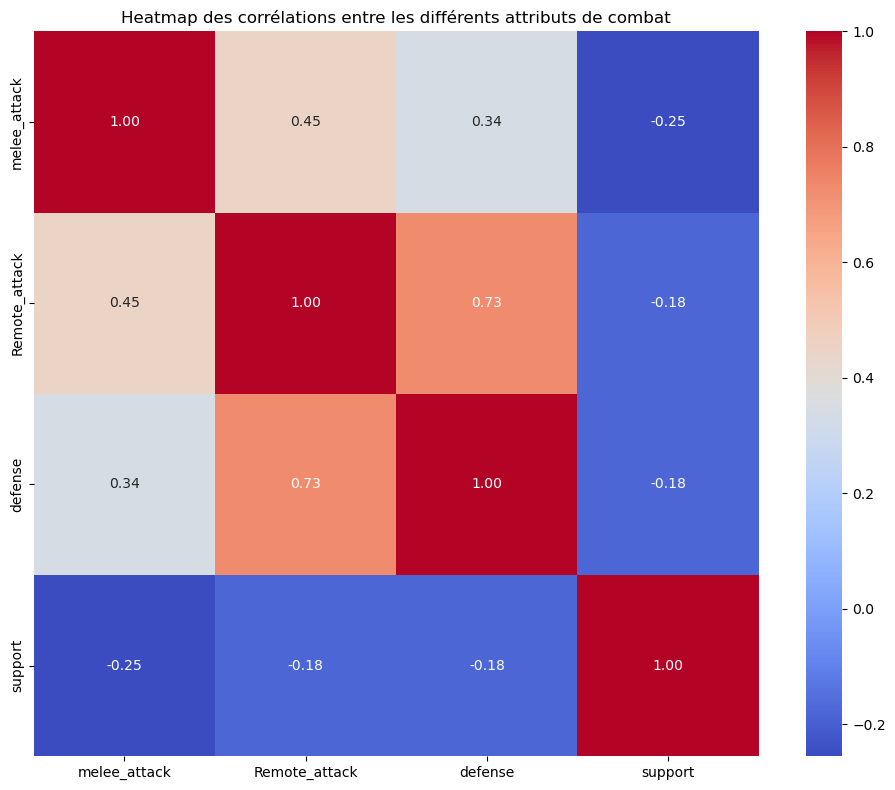

In [9]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
 select melee_attack, Remote_attack, defense,support from monsters;
"""

# === Lecture des données via pandas ===
df_pal_comb_attr = pd.read_sql(query, engine)

correlation_combat_attribut = df_pal_comb_attr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_combat_attribut, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap des corrélations entre les différents attributs de combat")
plt.tight_layout()
plt.show()

engine.dispose()


Nous pouvons voir dans ce graphique qu'il existe differentes correlations sur les attributs de combats:

Correlation modérée entre defense et melee_attack
Correlation modérée entre remote_attack et melee_attack
Correlation forte entre remote_attack et defense

### I. Comment la rareté d'un Pal affecte-t-elle les valeurs de ses attributs de base ?

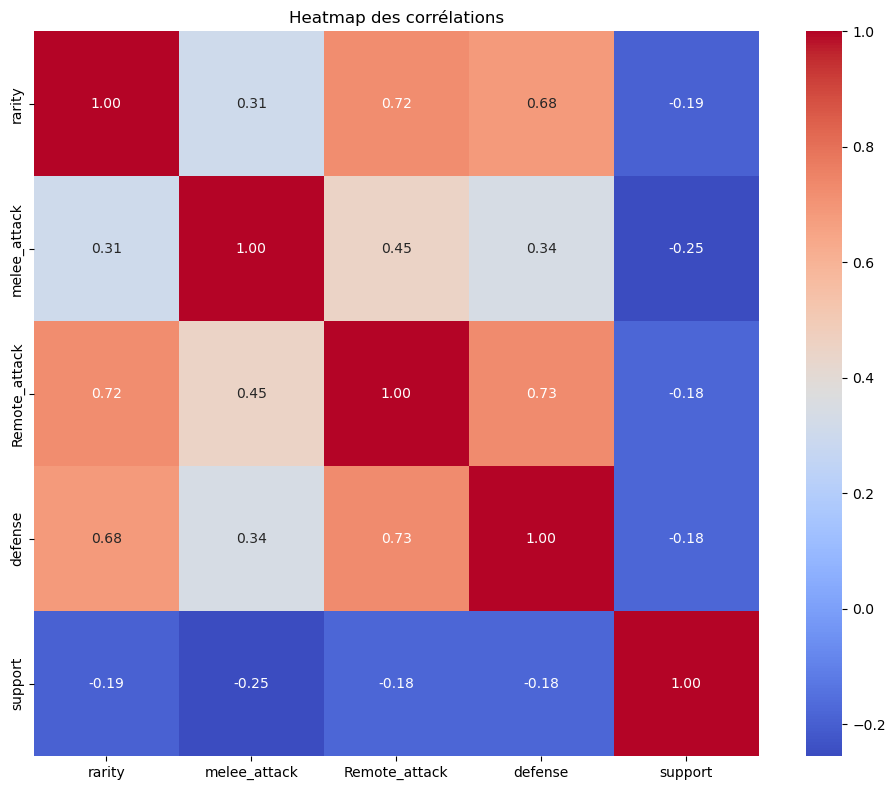

In [10]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
 select rarity, melee_attack, Remote_attack, defense,support from monsters;
"""

# === Lecture des données via pandas ===
df_pal_comb_attr = pd.read_sql(query, engine)

correlation_combat_attribut = df_pal_comb_attr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_combat_attribut, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap des corrélations")
plt.tight_layout()
plt.show()

engine.dispose()

La correlation de rareté du pals affecte:

De façon modéré la melee_attack
De façon forte la remote_attack et la défense du pals

### K. La taille des Pals affecte-t-elle leur performance au combat ?

size_encoded     1.000000
melee_attack     0.301194
Remote_attack    0.484397
defense          0.422419
support         -0.072035
Name: size_encoded, dtype: float64


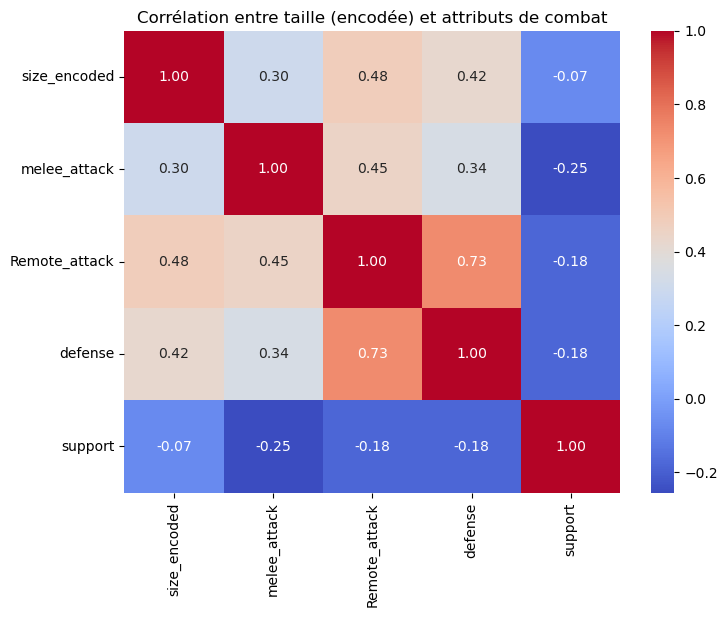

In [11]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query2 = """
 select size, melee_attack, Remote_attack, defense, support from monsters;
"""

# === Lecture des données via pandas ===
df_size_comb_attr = pd.read_sql(query2, engine)

size_order = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5}
df_size_comb_attr['size_encoded'] = df_size_comb_attr['size'].map(size_order)

correlations = df_size_comb_attr[['size_encoded', 'melee_attack', 'Remote_attack', 'defense', 'support']].corr()
print(correlations['size_encoded'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre taille (encodée) et attributs de combat")
plt.show()

Nous pouvons voir que la taille du pals a une correlation modérée sur les attributs de combat

In [ ]:
### P. Nombre de Pals adaptés au travail de nuit

In [62]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT COUNT(*) AS nombre_pals_nuit 
FROM job_skills 
WHERE night_shift = 1;
"""

# === Exécution et affichage ===
result = pd.read_sql(query, engine)
nombre_pals = result.iloc[0]['nombre_pals_nuit']

print(f"Nombre de Pals adaptés au travail de nuit : {nombre_pals}")

# === Fermeture du engine ===
engine.dispose()

Nombre de Pals adaptés au travail de nuit : 25


### R. Analyse des Pals par Compétences et Rareté

In [59]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT m.OverrideNameTextID, m.rarity, j.total_skills
FROM monsters m
JOIN job_skills j ON m.id = j.id
ORDER BY j.total_skills DESC, m.rarity DESC
LIMIT 10;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage des résultats ===
print("=== Top 10 des Pals avec le plus de compétences par rareté ===")
for index, row in df.iterrows():
    print(f"{index + 1}: {row['OverrideNameTextID']} - Rareté: {row['rarity']} - Compétences: {row['total_skills']}")

# === Fermeture du engine ===
engine.dispose()


=== Top 10 des Pals avec le plus de compétences par rareté ===
1: KingBahamut - Rareté: 9 - Compétences: 12
2: Serpent_Ground - Rareté: 5 - Compétences: 12
3: CowPal - Rareté: 2 - Compétences: 11
4: SnowBoss - Rareté: 10 - Compétences: 10
5: BlackMetalDragon - Rareté: 9 - Compétences: 10
6: VolcanoBoss - Rareté: 9 - Compétences: 10
7: DrillGame - Rareté: 5 - Compétences: 10
8: SharkKid_Fire - Rareté: 3 - Compétences: 10
9: IceHorse - Rareté: 20 - Compétences: 9
10: GrassRabbitMan - Rareté: 8 - Compétences: 9


In [ ]:
## Méthodologie
- Jointure de Tables: Utilisation d'une jointure entre `monsters` et `job_skills` pour combiner les données sur les caractéristiques des Pals et leurs compétences.
- Tri et Sélection: Les Pals sont triés par nombre de compétences et rareté, puis les 10 premiers sont sélectionnés.

Les résultats montrent les Pals avec le plus de compétences, facilitant une stratégie de jeu basée sur l'optimisation des ressources et des capacités.

### S. Quels sont les Pals qui ont la vitesse de travail la plus élevée ?

In [32]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT OverrideNameTextID, CraftSpeed
FROM monsters
WHERE CraftSpeed IS NOT NULL
ORDER BY CraftSpeed DESC
LIMIT 144;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage des résultats ===
print("=== Pals les moins feignants ===")
for index, row in df.iterrows():
    print(f"{index}: {row['OverrideNameTextID']} - Vitesse de travail: {row['CraftSpeed']}")

# === Fermeture du engine ===
engine.dispose()


=== Pals les moins feignants ===
0: SakuraSaurus_Water - Vitesse de travail: 100
1: AmaterasuWolf - Vitesse de travail: 100
2: RobinHood - Vitesse de travail: 100
3: RedArmorBird - Vitesse de travail: 100
4: ColorfulBird - Vitesse de travail: 100
5: Kelpie_Fire - Vitesse de travail: 100
6: PinkRabbit - Vitesse de travail: 100
7: SakuraSaurus - Vitesse de travail: 100
8: Alpaca - Vitesse de travail: 100
9: CatVampire - Vitesse de travail: 100
10: ChickenPal - Vitesse de travail: 100
11: SharkKid - Vitesse de travail: 100
12: Kelpie - Vitesse de travail: 100
13: Ronin - Vitesse de travail: 100
14: PlantSlime - Vitesse de travail: 100
15: PlantSlime - Vitesse de travail: 100
16: IceFox - Vitesse de travail: 100
17: CatBat - Vitesse de travail: 100
18: CatMage - Vitesse de travail: 100
19: ElecLion - Vitesse de travail: 100
20: Carbunclo - Vitesse de travail: 100
21: RobinHood_Ground - Vitesse de travail: 100
22: IceDeer - Vitesse de travail: 100
23: FengyunDeeper - Vitesse de travail: 100

Analyse de la Vitesse de Travail des Pals:

Tous les Pals ont la même vitesse de travail selon les données du CSV.

In [ ]:
### T. Stratégie optimale de capture des Pals

In [60]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT OverrideNameTextID, CaptureProbability, Nocturnal FROM monsters                 
ORDER BY CaptureProbability DESC
LIMIT 20;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage des résultats ===
print("=== Pals les plus faciles à capturer ===")
for index, row in df.iterrows():
    print(f"{index}: {row['OverrideNameTextID']} - Capture: {row['CaptureProbability']} - {nocturnal_status}")

# === Fermeture du engine ===
engine.dispose()


=== Pals les plus faciles à capturer ===
0: ChickenPal - Capture: 1.05 - Non-nocturne
1: SheepBall - Capture: 1.05 - Non-nocturne
2: PInkCat - Capture: 1.05 - Non-nocturne
3: VolcanoBoss - Capture: 1 - Non-nocturne
4: ForestBoss - Capture: 1 - Non-nocturne
5: DessertBoss - Capture: 1 - Non-nocturne
6: SnowBoss - Capture: 1 - Non-nocturne
7: GrassBoss - Capture: 1 - Non-nocturne
8: PlantSlime - Capture: 0.91 - Non-nocturne
9: PlantSlime - Capture: 0.91 - Non-nocturne
10: Ganesha - Capture: 0.91 - Non-nocturne
11: CuteFox - Capture: 0.91 - Non-nocturne
12: WoolFox - Capture: 0.91 - Non-nocturne
13: Hedgehog - Capture: 0.84 - Non-nocturne
14: ElecCat - Capture: 0.77 - Non-nocturne
15: BluePlatypus - Capture: 0.77 - Non-nocturne
16: Monkey - Capture: 0.77 - Non-nocturne
17: MopBaby - Capture: 0.77 - Non-nocturne
18: Kitsunebi - Capture: 0.77 - Non-nocturne
19: FlameBambi - Capture: 0.77 - Non-nocturne


Connaître les Pals les plus faciles à capturer dans Palworld permet de cibler efficacement ceux-ci, optimisant ainsi les ressources, le temps et la progression dans le jeu. Cela aide à construire rapidement une équipe solide et à planifier stratégiquement les sessions de jeu. De plus, savoir s'ils sont nocturnes ou non permet d'adapter les périodes de chasse pour maximiser les chances de capture.

### U. Quel Tower Boss a le score d'attributs de combat combinés le plus élevé ?

In [7]:
# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}
# Reconnexion à la base de données
try:
    conn = mariadb.connect(**config)
    cursor = conn.cursor()
    print("Connexion réussie à MariaDB !")
except mariadb.Error as e:
    print(f"Erreur de connexion : {e}")
    exit(1)

    # === Requête SQL ===
query = """
SELECT id, name,
  (HP + melee_attack + remote_attack + defense) / 2 AS medium
FROM 
   tower_bosses
ORDER BY 
   medium DESC
LIMIT 1;
"""
try:
    cursor.execute(query)
    result = cursor.fetchone()
    if result:
        print('Le gagnant est : ')
    print(f"ID : {result[0]}, Nom : {result[1]}, Moyenne de combat: {result[2]}")
    conn.commit()
except mariadb.Error as e:
    print(f" Erreur création table : {e}")
    conn.close()
    exit(1)

Connexion réussie à MariaDB !
Le gagnant est : 
ID : 1, Nom : Victor & Heterogeneous Griffin, Moyenne de combat: 4275.0000


Sélection du Tower Boss le Plus Puissant

Choix des colonnes

Les colonnes utilisées dans la requête SQL sont les suivantes :
- `id` : identifiant unique du boss.
- `name` : nom du boss pour l'affichage.
- Une moyenne calculée à partir de `HP`, `melee_attack`, `remote_attack` et `defense`.

Ces quatre attributs sont essentiels dans un contexte de combat :
- **HP** évalue la capacité de survie.
- **melee_attack** et **remote_attack** couvrent l’ensemble des types d’agression possibles.
- **defense** mesure la résistance générale.

La combinaison de ces données permet une comparaison cohérente entre les entités, en mettant en valeur leur efficacité globale en combat.

L’approche garantit une sélection objective du boss le plus complet sur le plan statistique.


### V. Quelle est la répartition des niveaux d’apparition des Pals ?

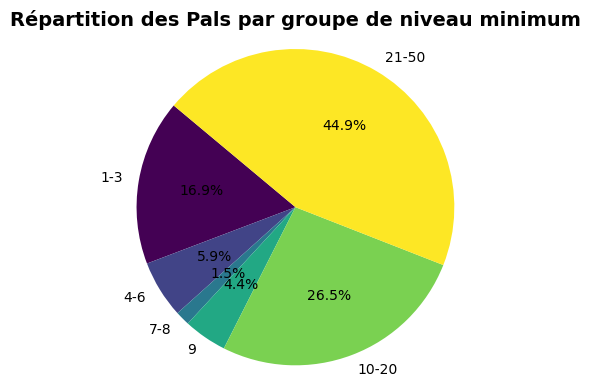

In [161]:
# === Connexion à MariaDB via SQLAlchemy ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# Création de l'engine SQLAlchemy
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT minimum_level
FROM palu_refresh_level
WHERE minimum_level IS NOT NULL;
"""

# === Lecture des données ===
df = pd.read_sql(query, engine)

# === Définition des tranches personnalisées ===
bins = [0, 3, 6, 8, 9, 20, 50]
labels = ['1-3', '4-6', '7-8', '9', '10-20', '21-50']

# Découpage des niveaux minimum en catégories
df['level_group'] = pd.cut(df['minimum_level'], bins=bins, labels=labels, right=True)

# Comptage des valeurs par groupe
group_counts = df['level_group'].value_counts().sort_index()

# === Affichage du camembert ===
plt.figure(figsize=(4, 4))
plt.pie(
    group_counts,
    labels=group_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(np.linspace(0, 1, len(group_counts)))
)
plt.title("Répartition des Pals par groupe de niveau minimum", fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# === Fermeture propre ===
engine.dispose()




Ce que notre analyse de répatition des niveaux min révèle :
Notre visualisation nous permet d'identifier les proportions exactes de Pals accessibles selon notre capacité réelle de capture en début de jeu.
L'insight de notre analyse :
En observant la répartition dans notre graphique en camembert, nous pouvons directement voir :

Quelle proportion de Pals est en capture quasi-garantie (niveau 1-3)
Quelle proportion reste viable avec de bonnes chances (niveau 4-6)
Quelle proportion demande plus d'efforts mais reste possible (niveau 7-8)
Quelle proportion est pratiquement hors de portée (niveau 9+)

L'utilité stratégique :
Notre code nous donne une cartographie précise de l'accessibilité du contenu Pals. Nous savons exactement quelle portion du roster nous est réellement disponible selon nos contraintes de capture en début de partie.
Cette visualisation transforme les mécaniques abstraites de capture en données concrètes sur la richesse du contenu accessible.

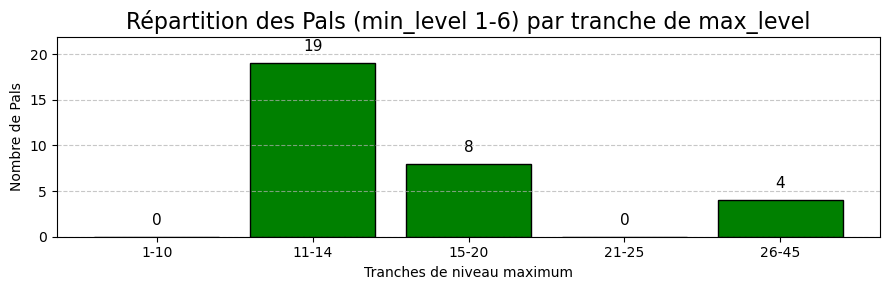

In [162]:
# Configuration base de données
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# Création du moteur SQLAlchemy
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# Requête SQL pour Pals avec minimum_level entre 1 et 3
query = """
SELECT name, minimum_level, maximum_level
FROM palu_refresh_level
WHERE minimum_level BETWEEN 1 AND 6;
AND ispal
"""

df = pd.read_sql(query, engine)

# Définition des tranches personnalisées pour maximum_level
bins = [0, 10, 14, 20, 25, 45]
labels = ['1-10', '11-14', '15-20', '21-25', '26-45']
df['max_level_group'] = pd.cut(df['maximum_level'], bins=bins, labels=labels, right=True)

# Comptage du nombre de Pals par groupe
group_counts = df['max_level_group'].value_counts().sort_index()

# Visualisation en barres verticales
plt.figure(figsize=(9,3))
bars = plt.bar(group_counts.index, group_counts.values, color='green', edgecolor='black')

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.title("Répartition des Pals (min_level 1-6) par tranche de max_level", fontsize=16)
plt.xlabel("Tranches de niveau maximum")
plt.ylabel("Nombre de Pals")
plt.ylim(0, max(group_counts.values)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

engine.dispose()


Stratégie de départ : sélection optimisée des Pals

Nous avons filtré les Pals avec un minimum_level entre 1 et 6 pour identifier ceux accessibles dès le début. En regroupant leur maximum_level par tranches (1–10, 10–14, 15–20, 20–25, 25–45), nous avons évalué leur potentiel d’évolution.

Les Pals de bas niveau avec un fort niveau max offrent un excellent retour sur investissement : ils restent utiles plus longtemps, optimisent la gestion des ressources et limitent les remplacements précoces.

Cette approche guide un choix stratégique dès les premières heures de jeu.

### W. Quelle est la répartition des zones d’apparition ?

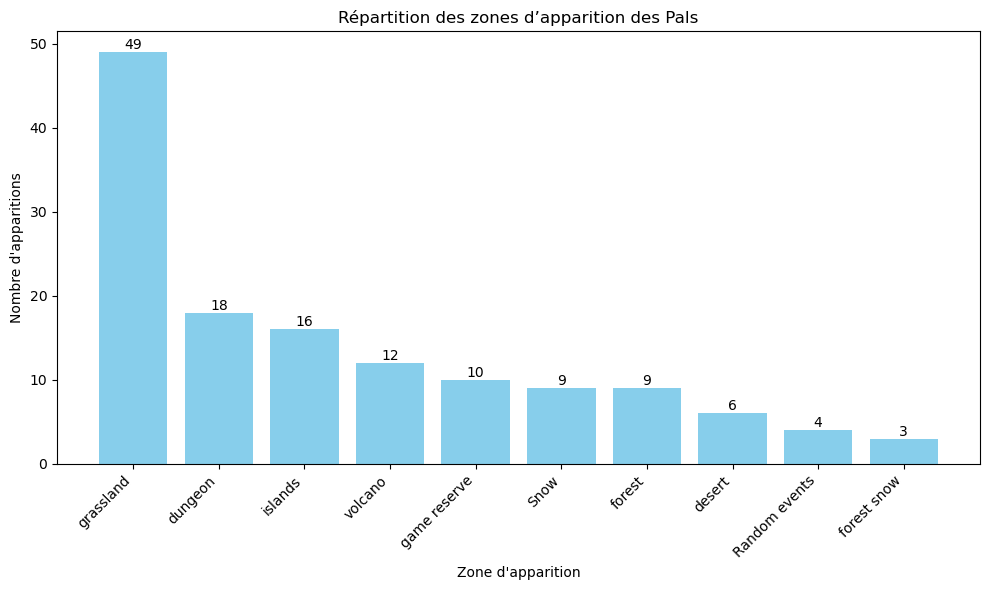

In [170]:

# === Config base de données ===
config = {
    'user': 'root',
    'password': 'cN06+#P34',
    'host': 'localhost',
    'port': 3307,
    'database': 'palworld_database'
}

# === Connexion à MariaDB via SQLAlchemy engine ===
engine = create_engine(
    f"mariadb+mariadbconnector://{config['user']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"
)

# === Requête SQL ===
query = """
SELECT refresh_area, COUNT(*) AS total
FROM palu_refresh_level
GROUP BY refresh_area
ORDER BY total DESC;
"""

# === Lecture des données via pandas ===
df = pd.read_sql(query, engine)

# === Affichage graphique ===
plt.figure(figsize=(10, 6))
bars = plt.bar(df['refresh_area'], df['total'], color='skyblue')
plt.xlabel("Zone d'apparition")
plt.ylabel("Nombre d'apparitions")
plt.title("Répartition des zones d’apparition des Pals")

# Ajoute le nombre sur chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Fermeture du engine ===
engine.dispose()


Ce que notre analyse révèle :
Notre visualisation identifie la densité de Pals par zone d'apparition.
L'utilité stratégique :
Nous savons exactement quelles zones prioriser pour maximiser nos rencontres de nouveaux Pals et quelles zones éviter car pauvres en diversité.
Notre analye transforme l'exploration aléatoire en stratégie d'exploration ciblée.

